In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries for data visualization
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.decomposition import PCA
import xgboost as xgb

In [ ]:
csv_path = "/content/drive/My Drive/MQM_Team36/Data_Science_Project/SeoulBikeData.csv"
data = pd.read_csv(csv_path, encoding='ISO-8859-1')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Data Cleaning

In [ ]:
# Checking for missing values and their proportion
missing_values = data.isnull().sum()
missing_proportion = missing_values / len(data) * 100

# Summary statistics of the dataset
summary_stats = data.describe()

# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display missing values and their proportions
print("Missing Values and Proportions:\n", missing_proportion)

# Summary statistics of the dataset
summary_stats = data.describe()

# Display summary statistics
print("\nSummary Statistics:\n", summary_stats)


Missing Values and Proportions:
 Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

Summary Statistics:
        Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000     

In [ ]:
#Get weekends and weekdays
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['is_weekend'] = data['Date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
# Counting the number of zeros in each column
zeros_count = (data == 0).sum()

# Calculating the proportion of zeros in each column
zeros_proportion = zeros_count / len(data) * 100

# Displaying the result to the user
zeros_df = pd.DataFrame({
    'Zeros Count': zeros_count,
    'Zeros Proportion (%)': zeros_proportion
})

zeros_df

,Zeros Count,Zeros Proportion (%)
Date,0,0.000000
Rented Bike Count,295,3.367580
Hour,365,4.166667
Temperature(°C),21,0.239726
Humidity(%),17,0.194064
Wind speed (m/s),74,0.844749
Visibility (10m),0,0.000000
Dew point temperature(°C),60,0.684932
Solar Radiation (MJ/m2),4300,49.086758
Rainfall(mm),8232,93.972603


In [ ]:
# One-hot encoding for 'Seasons'
data = pd.get_dummies(data, columns=['Seasons'], drop_first=False)

# Convert one-hot encoded columns from boolean to integer
season_columns = [col for col in data.columns if 'Seasons_' in col]
data[season_columns] = data[season_columns].astype(int)

# Label encoding for 'Holiday' (binary)
data['Holiday'] = data['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Label encoding for 'Functioning Day' (binary)
data['Functioning Day'] = data['Functioning Day'].map({'Yes': 1, 'No': 0})

# Display the transformed DataFrame
print(data.head())

#Feature Enginnering: Add Weekends and Weekdays
# Step 1: Preprocess the data
# Drop non-numeric columns (if there are categorical features)
data_numeric = data.select_dtypes(include=['number'])

        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0           0.0            0.0        0   
1                      0.0  

# Data Visulization/EDA

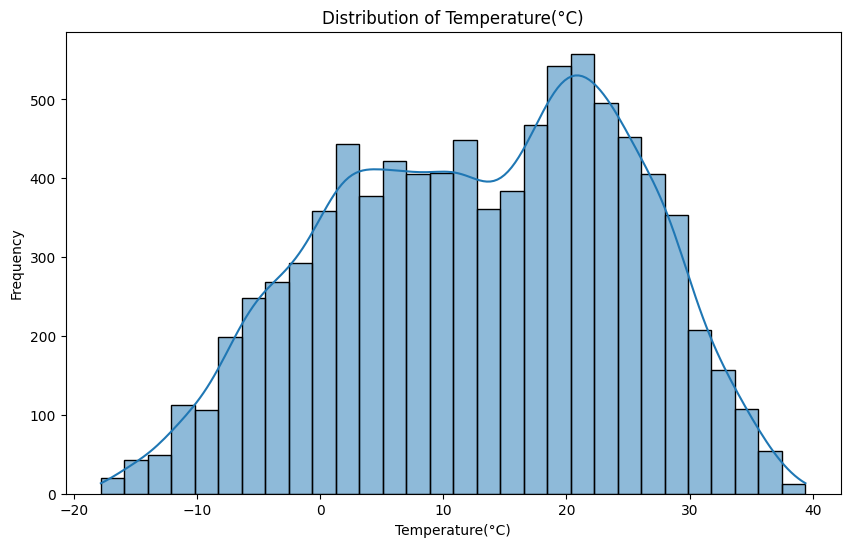

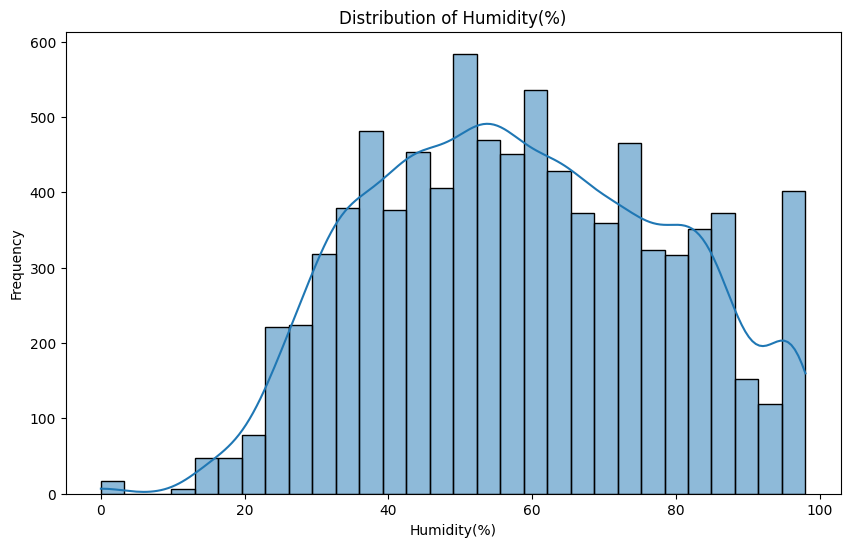

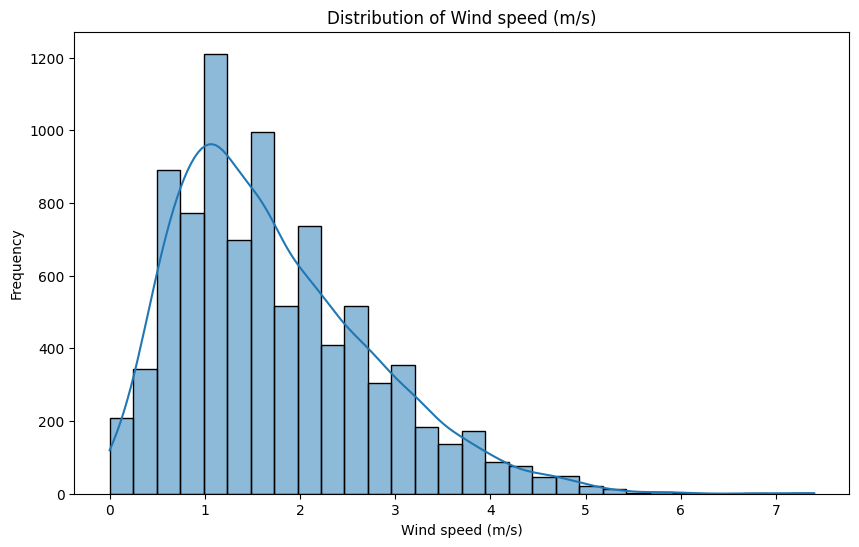

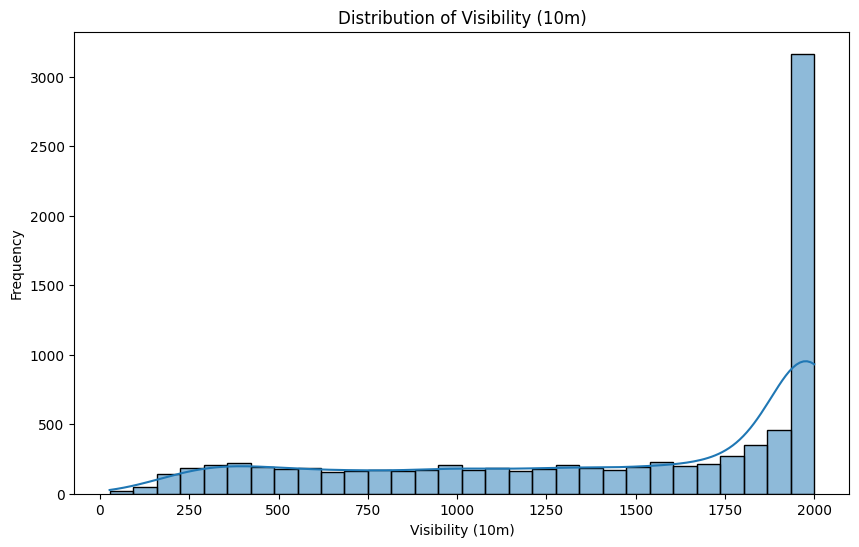

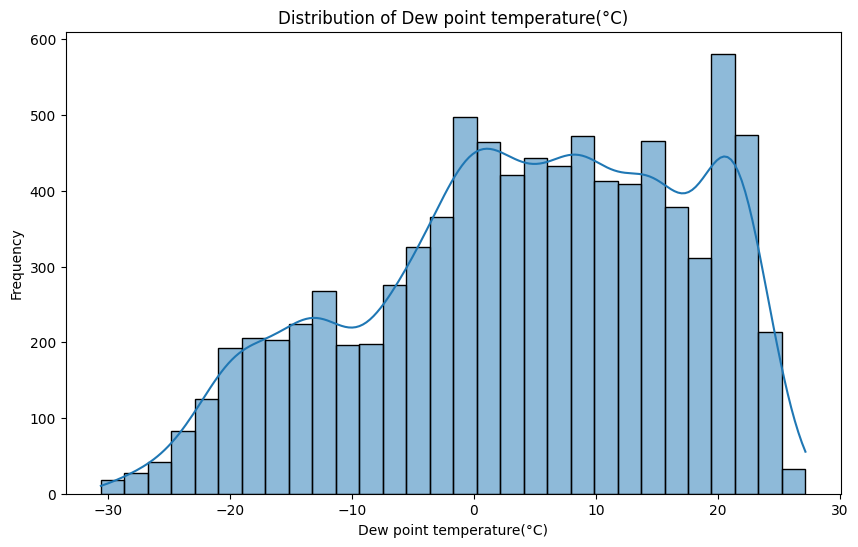

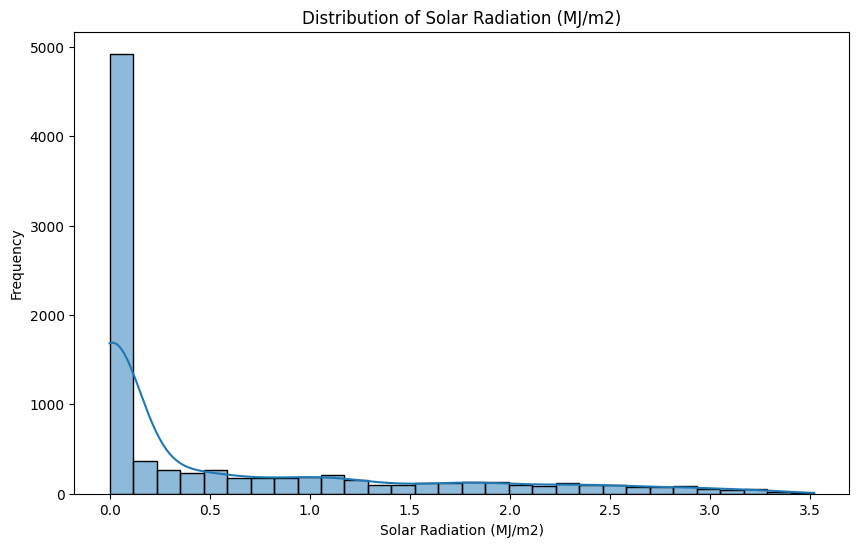

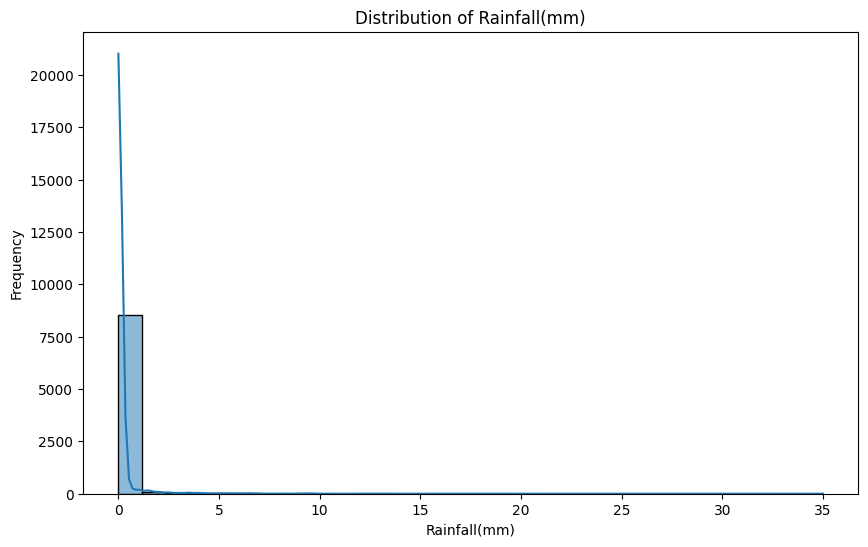

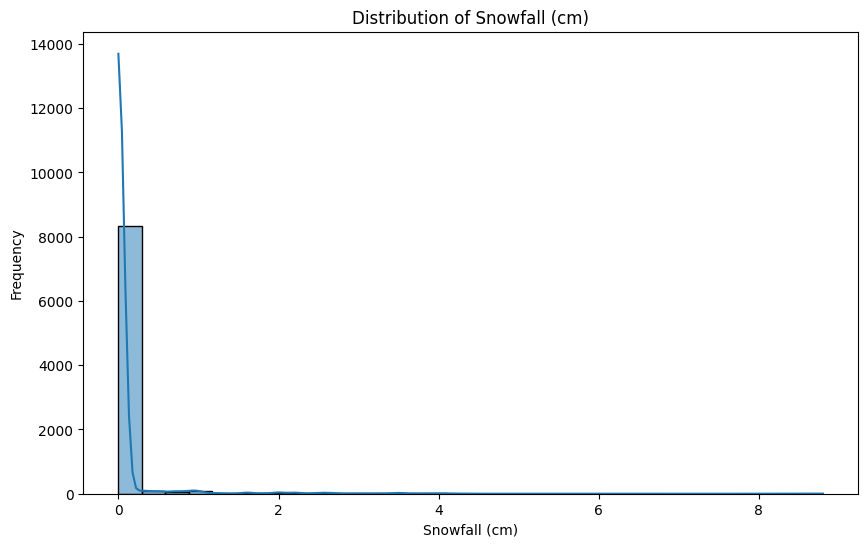

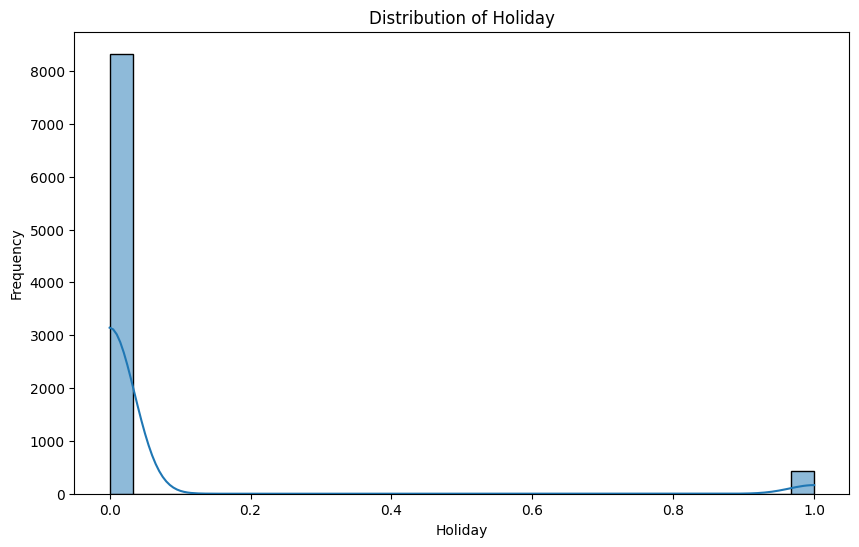

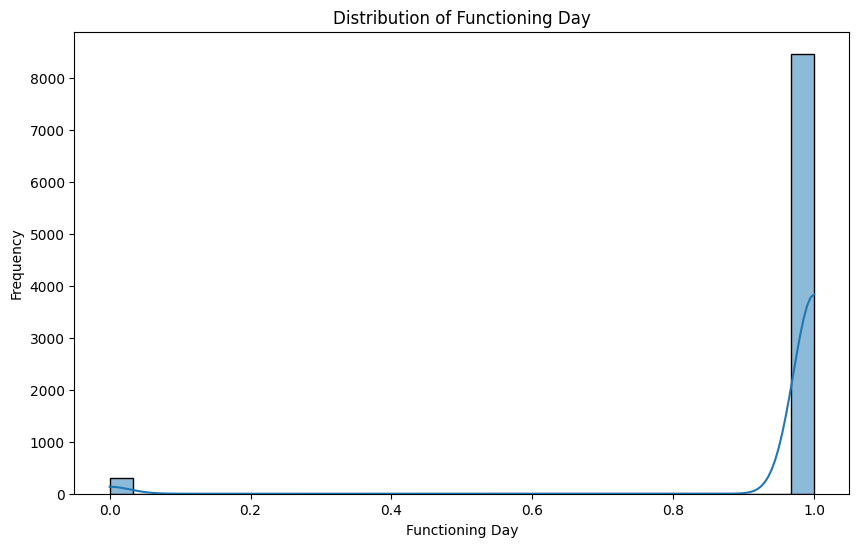

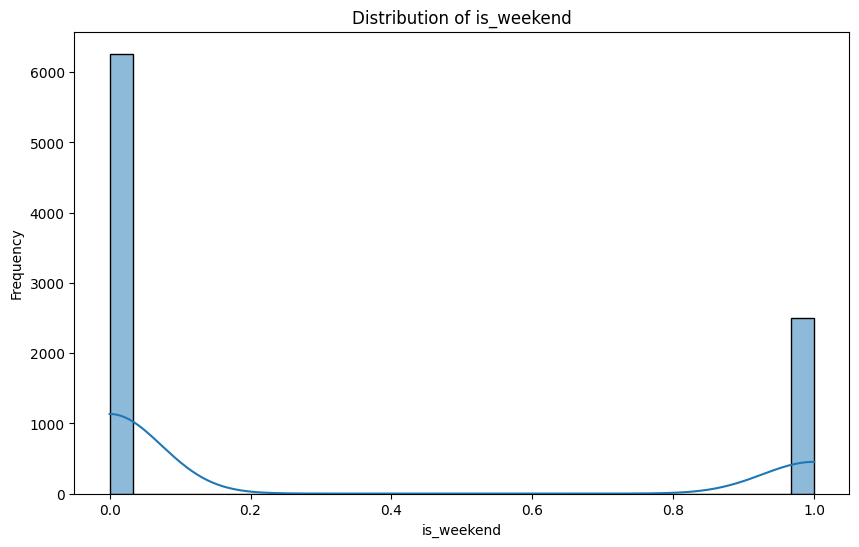

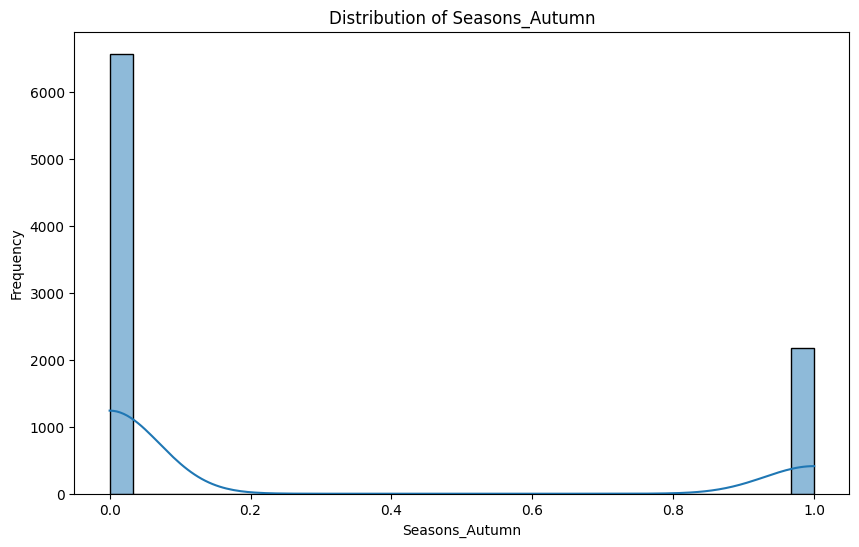

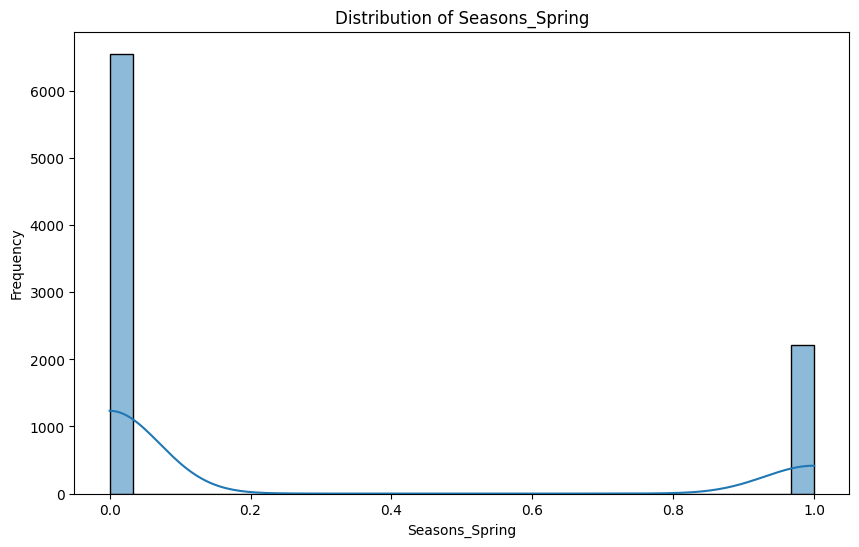

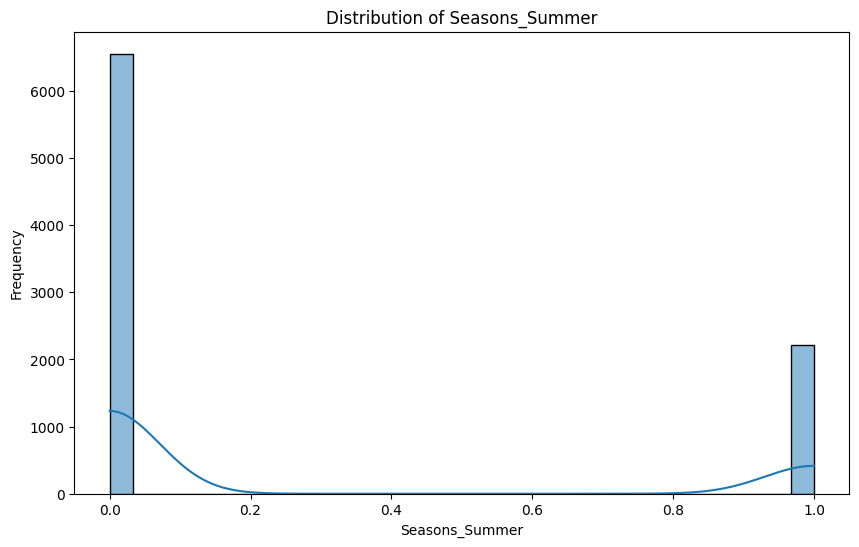

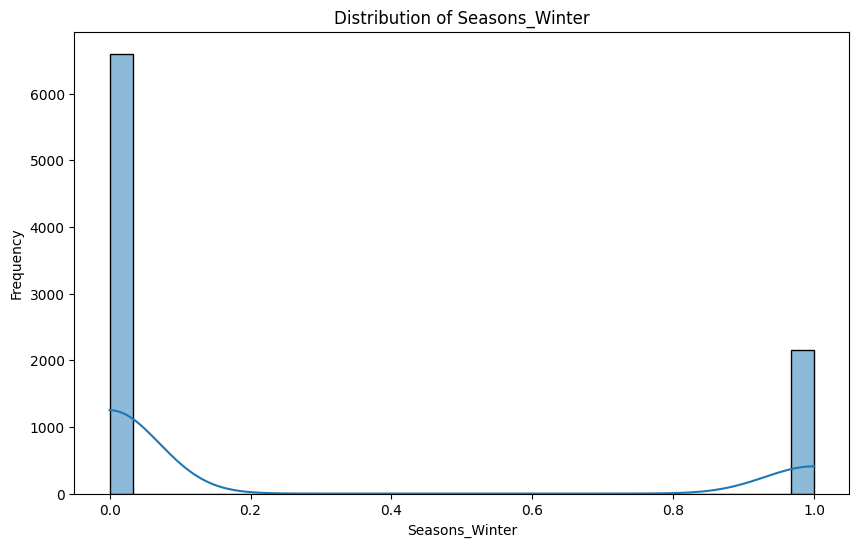

In [ ]:
# Visualizing each column based on its data type
# Function to create a visualization based on column type
def visualize_column(column):
    plt.figure(figsize=(10, 6))
    if pd.api.types.is_numeric_dtype(data[column]):
        sns.histplot(data[column], bins=30, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        sns.countplot(data[column])
        plt.title(f'Count of {column} categories')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.show()

# Loop through each column and create visualizations, excluding 'Date' and 'Rented Bike Count'
for column in data.columns:
    if column not in ['Date', 'Rented Bike Count', 'Hour']:  # Exclude specific columns
        visualize_column(column)


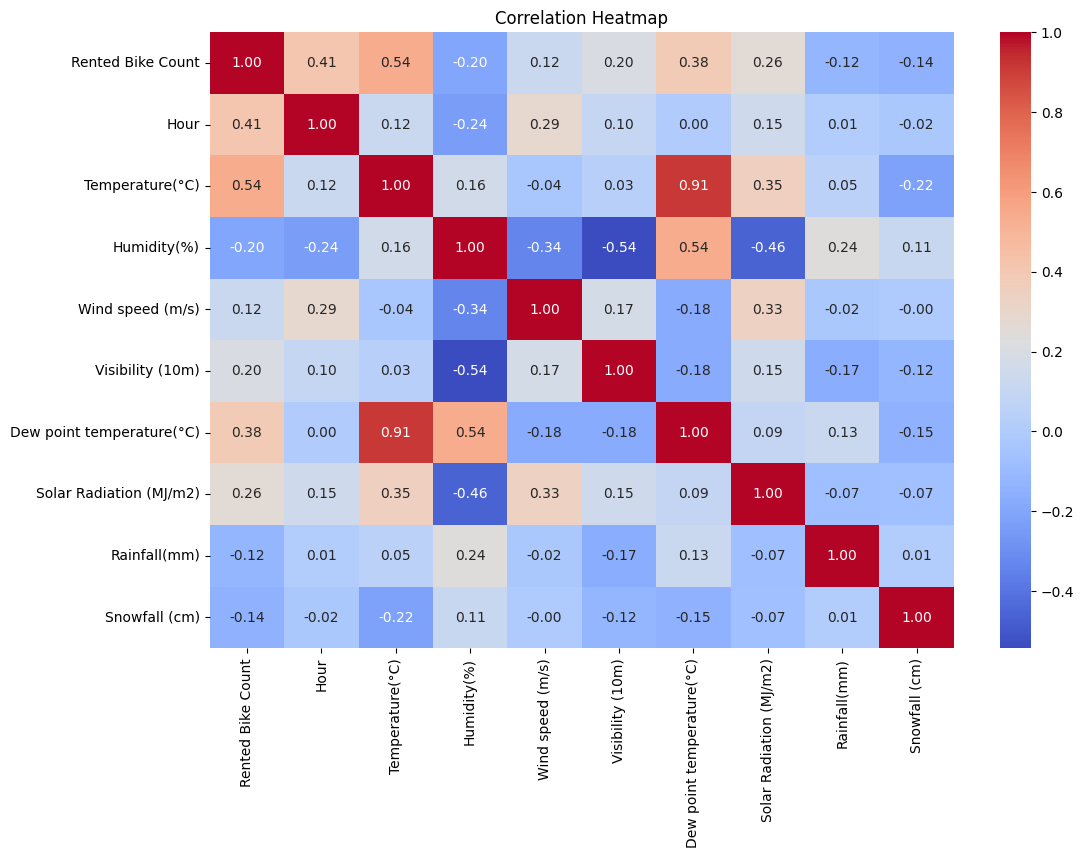

In [ ]:
# Plotting the correlation heatmap of the numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

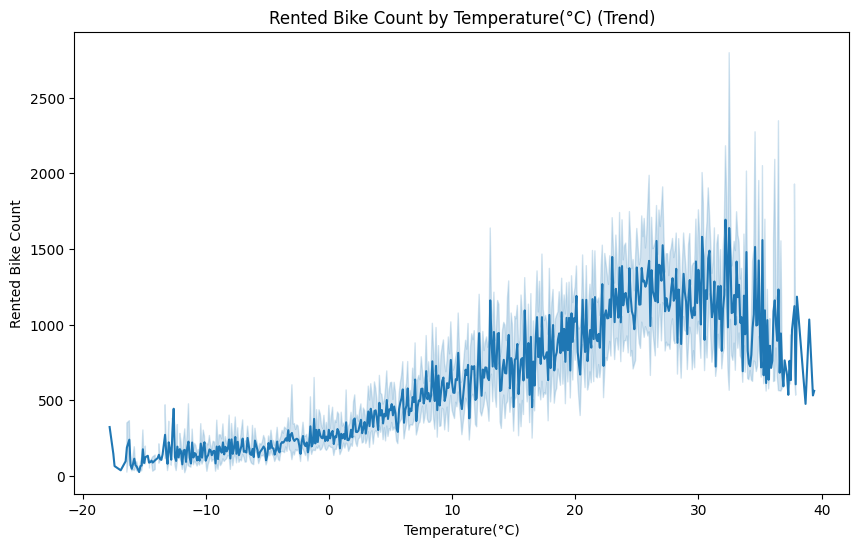

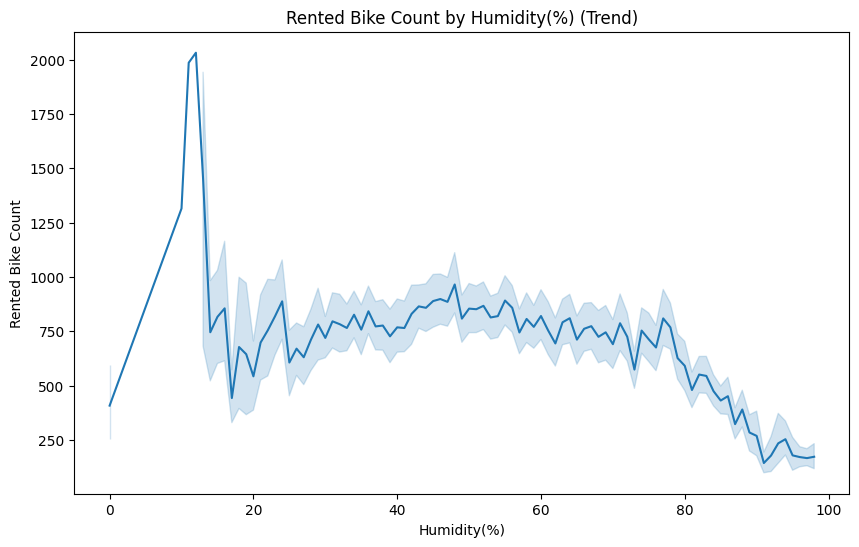

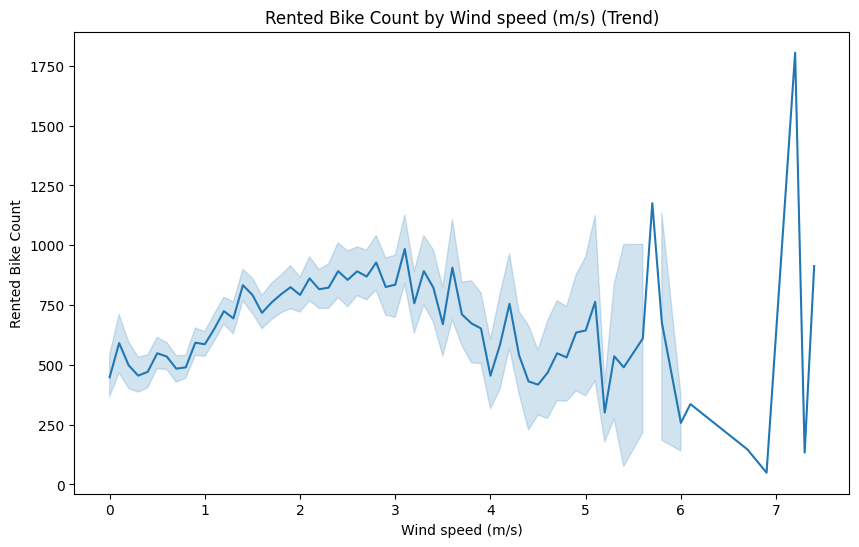

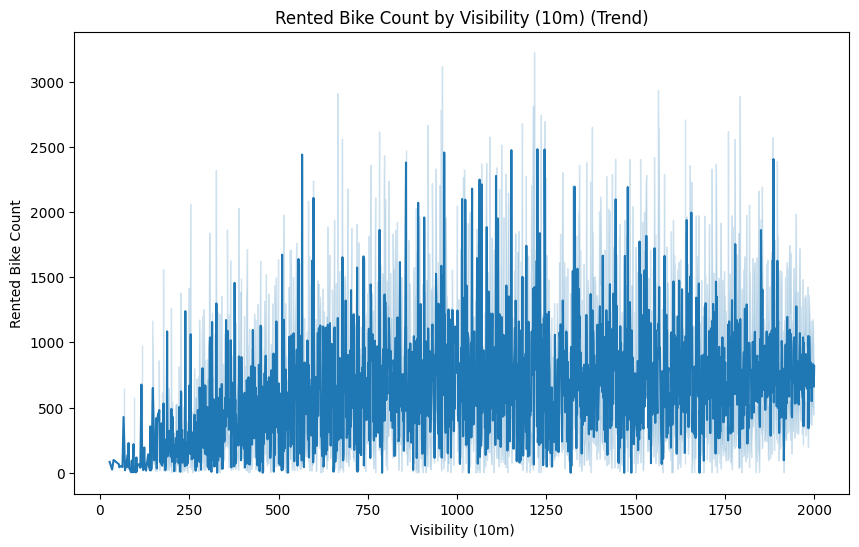

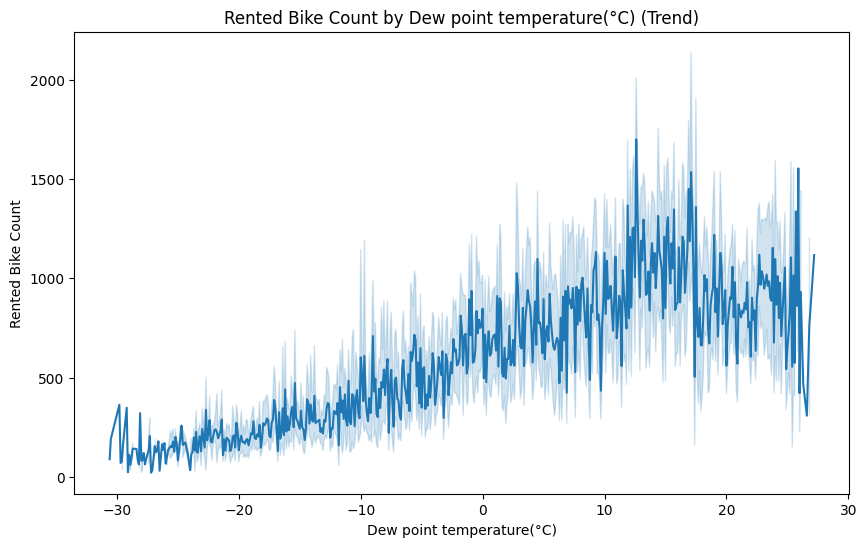

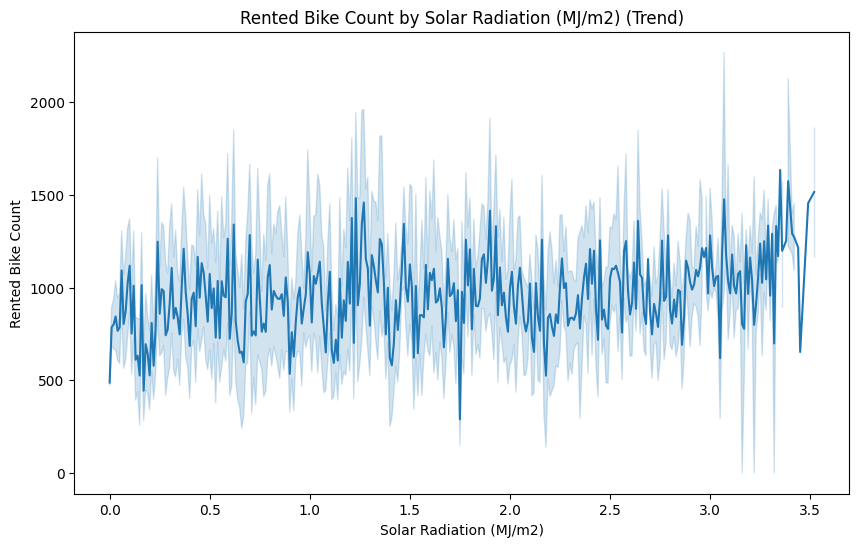

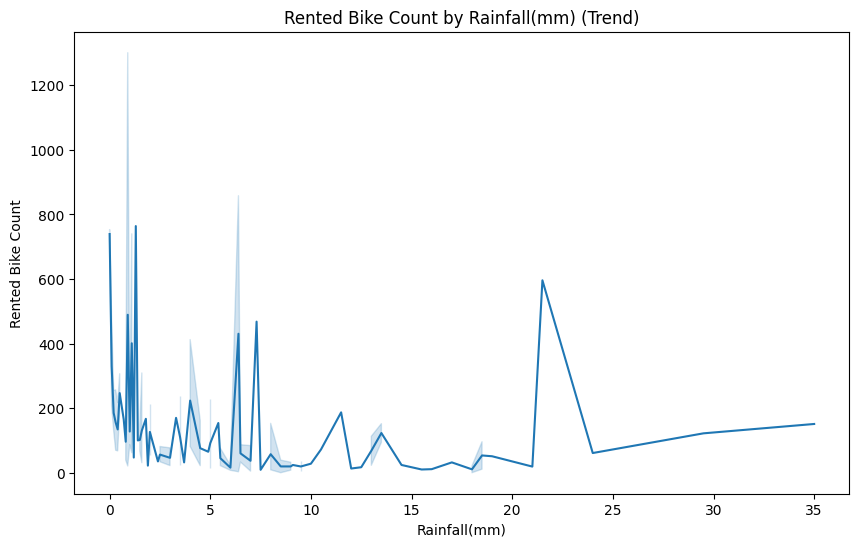

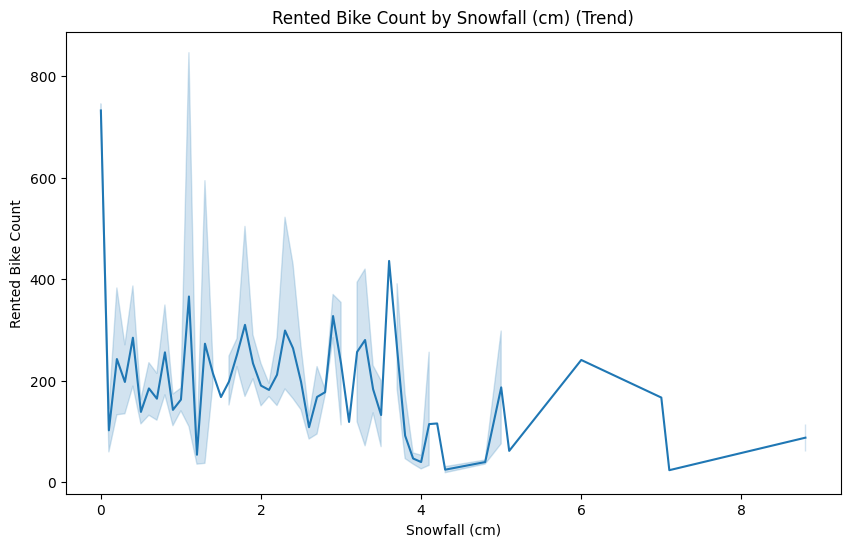

In [ ]:
# Function to visualize Rented Bike Count distribution by each column
def visualize_bike_count_by_column(column):
    plt.figure(figsize=(10, 6))

    # Check if the column is numeric or categorical
    if pd.api.types.is_numeric_dtype(data[column]):
        # Line plot for numeric columns to show the trend
        sns.lineplot(x=data[column], y=data['Rented Bike Count'])
        plt.title(f'Rented Bike Count by {column} (Trend)')
        plt.xlabel(column)
        plt.ylabel('Rented Bike Count')
    plt.show()

# List of columns to visualize against Rented Bike Count
columns = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
           'Visibility (10m)', 'Dew point temperature(°C)',
           'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Loop through each column and create the visualizations
for column in columns:
    visualize_bike_count_by_column(column)


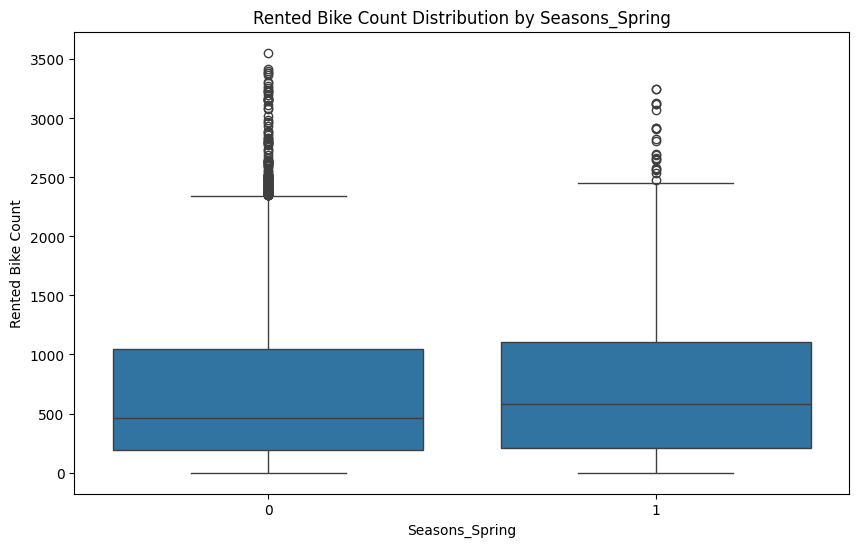

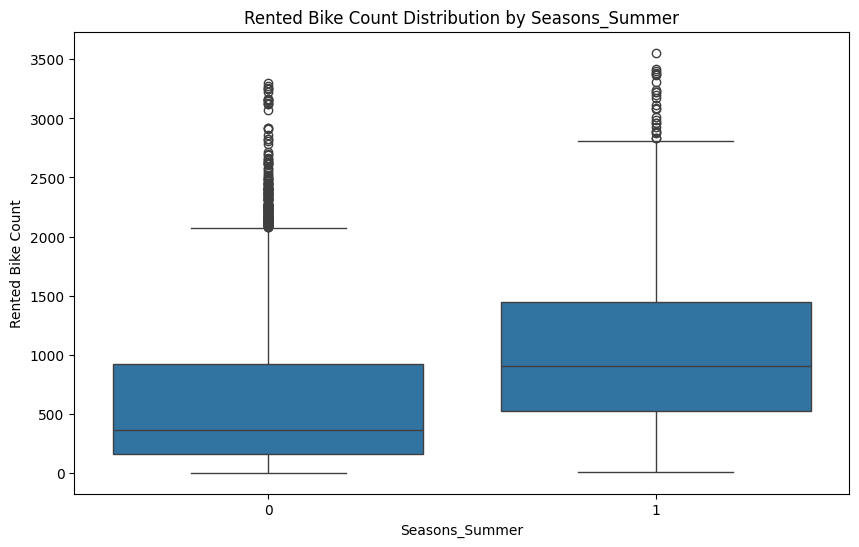

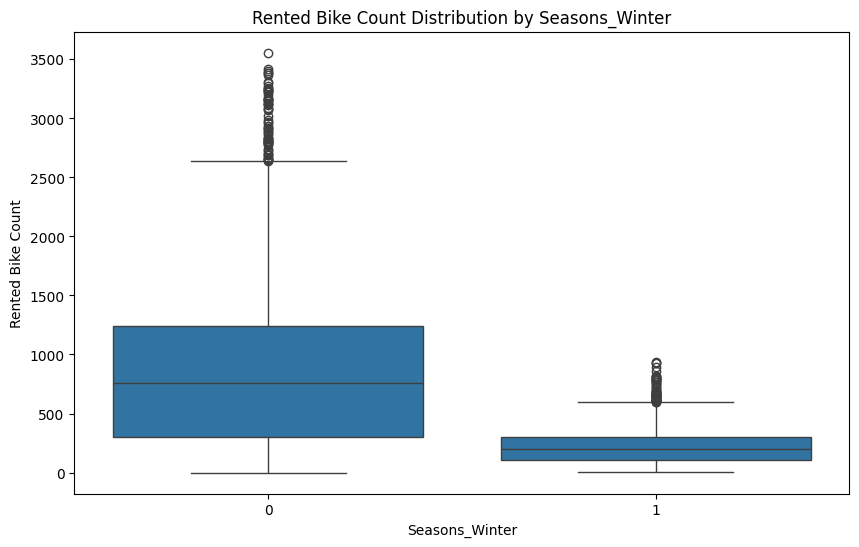

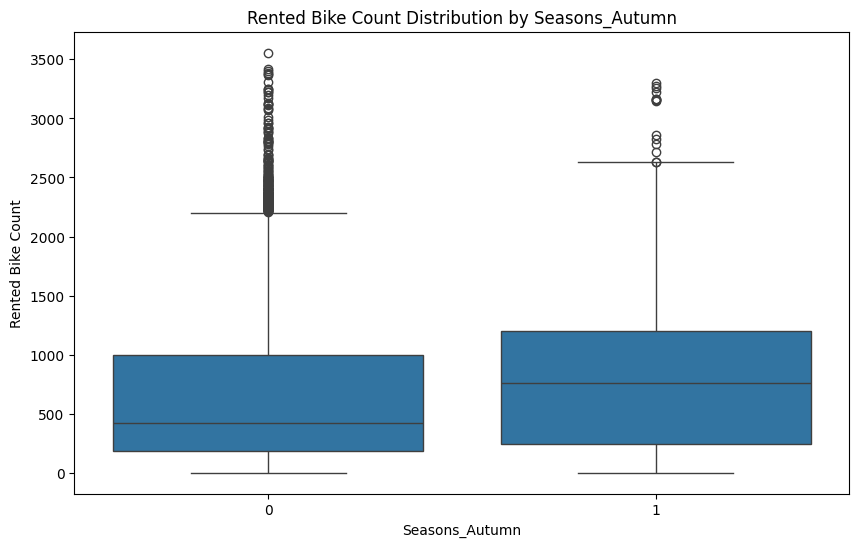

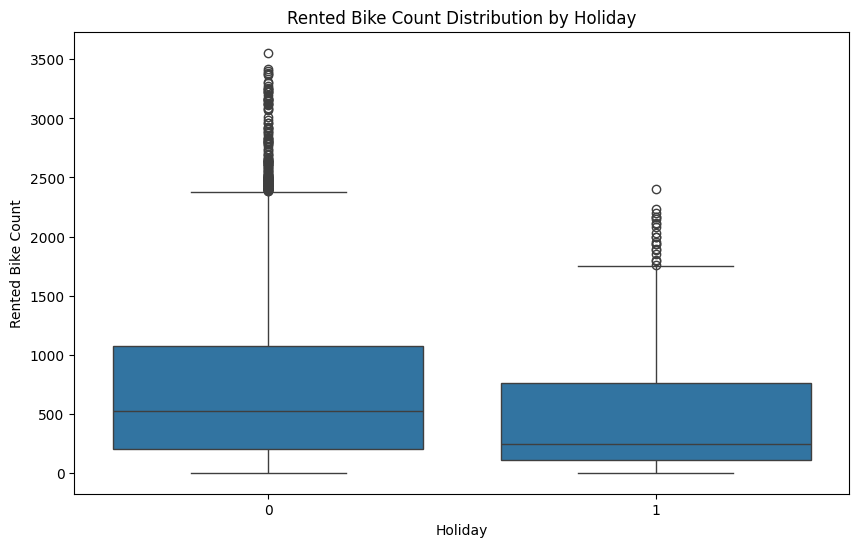

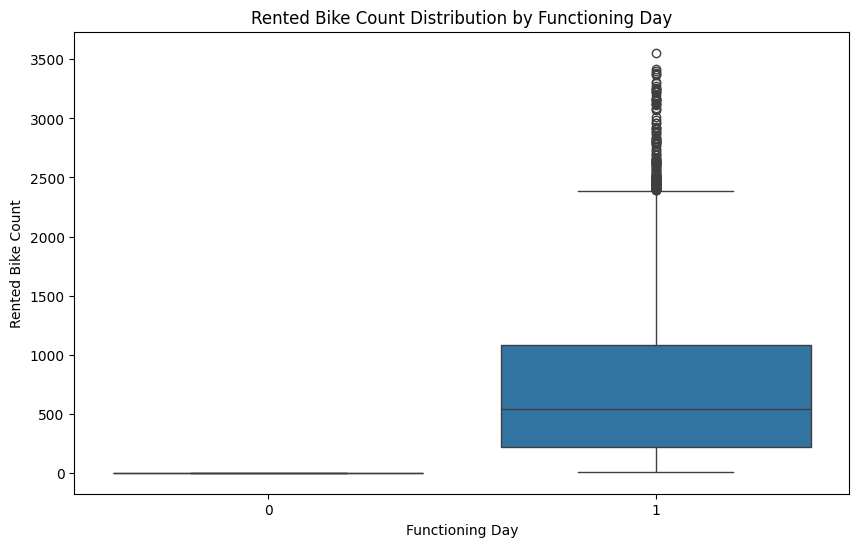

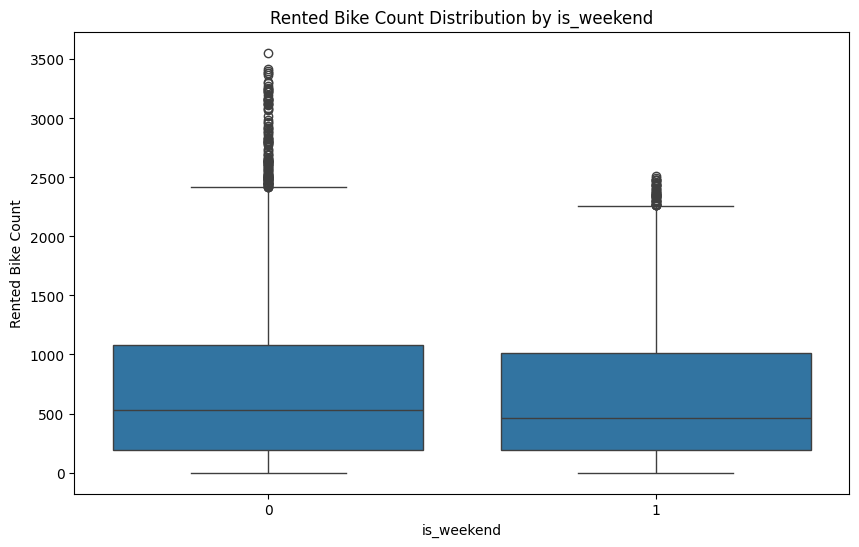

In [ ]:
# List of categorical columns to visualize against 'Rented Bike Count'
categorical_columns = ['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Seasons_Autumn', 'Holiday', 'Functioning Day', 'is_weekend']

# Loop through each categorical column and create a box plot
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column], y=data['Rented Bike Count'])
    plt.title(f'Rented Bike Count Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Rented Bike Count')
    plt.show()


In [ ]:
print(data.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'is_weekend', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')


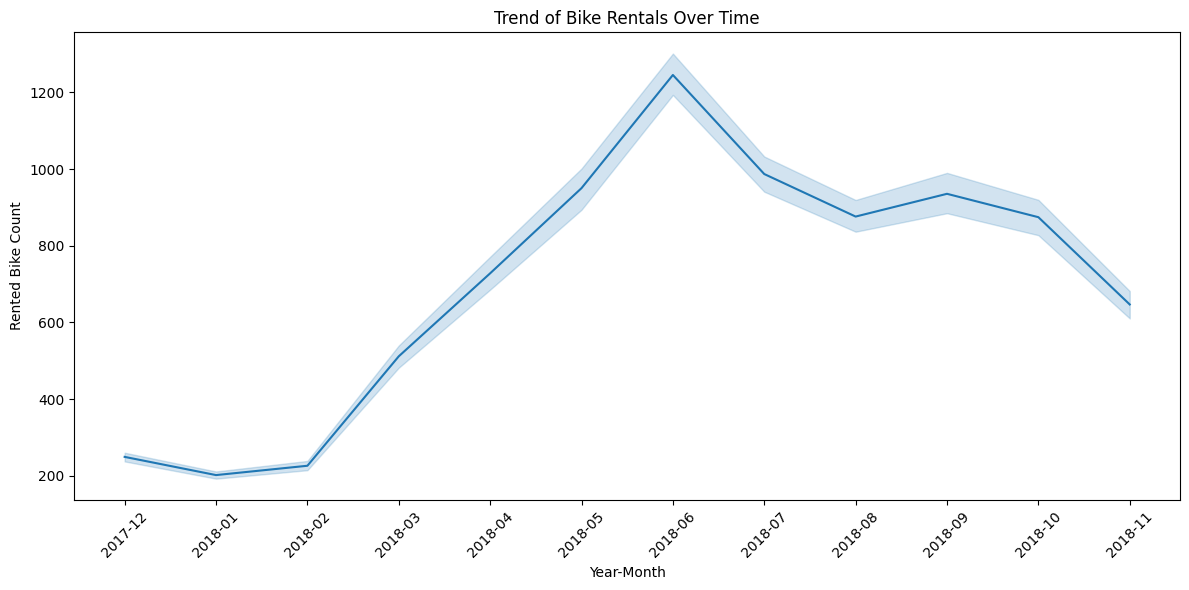

In [ ]:
# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Extracting month and year from the 'Date' column
data['Year-Month'] = data['Date'].dt.to_period('M')

# Visualizing the trend of bike rentals over time (Year-Month)
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['Year-Month'].astype(str), y=data['Rented Bike Count'])
plt.xticks(rotation=45)
plt.title('Trend of Bike Rentals Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Rented Bike Count')
plt.tight_layout()
plt.show()


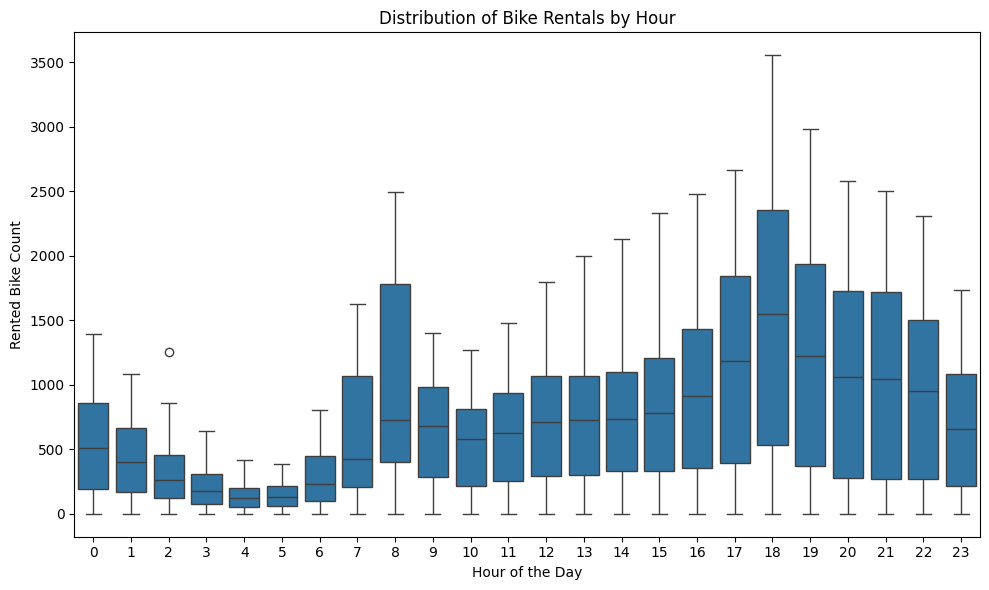

In [ ]:
# Visualizing the distribution of bike rentals by hour using a boxplot to show distribution across different hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Hour'], y=data['Rented Bike Count'])
plt.title('Distribution of Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.tight_layout()
plt.show()


In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'is_weekend', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Year-Month'],
      dtype='object')

# Basic Regression Analysis

In [ ]:
# Baseline Multilinear Regression
# Fit the linear model
X = data.drop(columns=['Rented Bike Count', 'Date', 'Year-Month', 'Seasons_Autumn'])

y = data['Rented Bike Count']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     722.0
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:17:59   Log-Likelihood:                -65570.
No. Observations:                8760   AIC:                         1.312e+05
Df Residuals:                    8744   BIC:                         1.313e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Holiday                    8760 non-null   int64         
 12  Functi

                           Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
Holiday                            -0.072338 -1.391486e-16        -0.055931   
Functioning Day                     0.203943  5.4393

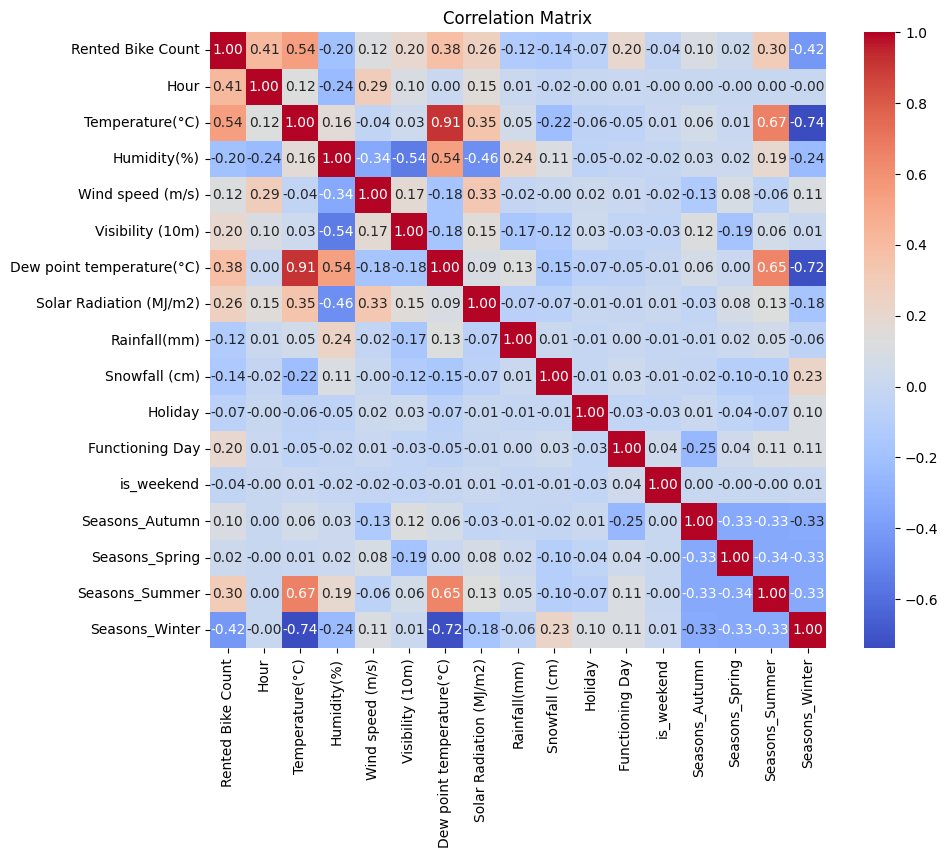

Variables to remove due to high correlation: {'Dew point temperature(°C)', 'Temperature(°C)'}
Columns after removal of highly correlated variables:
Index(['Rented Bike Count', 'Hour', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Functioning Day', 'is_weekend',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')


In [ ]:
# Calculate the correlation matrix for the relevant numeric columns
cols_corr = data.drop(columns=['Date', 'Year-Month'])

correlation_matrix = cols_corr.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Set threshold for high correlation
threshold = 0.8

# Find highly correlated pairs
high_correlation_pairs = correlation_matrix.where(abs(correlation_matrix) > threshold).stack().index.tolist()

# Filter out diagonal elements
high_correlation_pairs = [(x, y) for x, y in high_correlation_pairs if x != y]

# Get names of variables to remove
to_remove = set()
for x, y in high_correlation_pairs:
    to_remove.add(x)

print("Variables to remove due to high correlation:", to_remove)

# Ensure that only the relevant columns from 'cols_corr' are used for filtering
df_reduced = cols_corr.loc[:, ~cols_corr.columns.isin(to_remove)]

# Print the column names of the new DataFrame
print("Columns after removal of highly correlated variables:")
print(df_reduced.columns)


In [ ]:
# Regression on reduced correlation
# Fit the linear model
X = df_reduced.drop(columns=['Rented Bike Count', 'Seasons_Autumn'])
y = df_reduced['Rented Bike Count']

# Transform target variable using log
y_log = np.log1p(y)  # log1p is log(1 + y) to handle zero values

# Add a constant to the model (intercept)
X = sm.add_constant(X)

model = sm.OLS(y_log, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     2266.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:18:01   Log-Likelihood:                -9974.7
No. Observations:                8760   AIC:                         1.998e+04
Df Residuals:                    8746   BIC:                         2.008e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Remove non-significant variables from the model
X_vif = X.drop(columns=['Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)'])

# Recalculate VIF after further refinement
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

# Re-run the OLS regression with the refined features
X_vif = sm.add_constant(X_vif)
model_refined = sm.OLS(y_log, X_vif).fit()
print(model_refined.summary())


           Feature        VIF
0            const  46.681461
1             Hour   1.072346
2      Humidity(%)   1.218256
3     Rainfall(mm)   1.065036
4          Holiday   1.016483
5  Functioning Day   1.074412
6       is_weekend   1.003210
7   Seasons_Spring   1.558370
8   Seasons_Summer   1.605484
9   Seasons_Winter   1.627065
                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     3233.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:18:01   Log-Likelihood:                -10018.
No. Observations:                8760   AIC:                         2.006e+04
Df Residuals:                    8750   BIC:                         2.013e+04
Df Model:                           9 

In [ ]:
# Create interaction terms based on correlation heat map
# data['Temp_Solar'] = data['Temperature(°C)'] * data['Solar Radiation (MJ/m2)'] #1
data['Temp_Summer'] = data['Temperature(°C)'] * data['Seasons_Summer']
data['Temp_Winter'] = data['Seasons_Winter'] * data['Temperature(°C)']
data['Temp_Snow'] = data['Snowfall (cm)'] * data['Temperature(°C)']
data['DTemp_Winter'] = data['Seasons_Winter'] * data['Dew point temperature(°C)']
data['Hour_Wind'] = data['Hour'] * data['Wind speed (m/s)']
data['Hour_weekend'] = data['Hour'] * data['is_weekend']
data['Solar_Wind'] = data['Solar Radiation (MJ/m2)'] * data['Wind speed (m/s)']

# Define X and y for the regression model with interaction terms
X_interaction = data[['Hour','Humidity(%)', 'Rainfall(mm)',
                      'Holiday', 'Functioning Day', 'is_weekend',
                      'Seasons_Spring', 'Seasons_Winter',
                      'Temp_Summer', 'Temp_Winter',
                      'DTemp_Winter', 'Hour_Wind', 'Temp_Snow','Solar_Wind',
                      'Hour_weekend'
                      ]]

# Add a constant for the intercept
X_interaction = sm.add_constant(X_interaction)

# Fit the OLS model using statsmodels with interaction terms
model_interaction = sm.OLS(y_log, X_interaction).fit()

print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     2078.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:18:01   Log-Likelihood:                -9782.7
No. Observations:                8760   AIC:                         1.960e+04
Df Residuals:                    8744   BIC:                         1.971e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8128      0.061     

In [ ]:
# Make predictions using the model
y_log_pred = model_interaction.predict(X_interaction)

# Calculate RMSE in the log-transformed scale
rmse_log = mean_squared_error(y_log, y_log_pred, squared=False)

# Print the RMSE values
print(f"RMSE in the log-transformed scale: {rmse_log:.2f}")


RMSE in the log-transformed scale: 0.74


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Define the model
model = LinearRegression()

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define custom scorers for RMSE and R^2
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for RMSE and R^2
cv_rmse = cross_val_score(model, X, y_log, cv=kf, scoring=rmse_scorer)
cv_r2 = cross_val_score(model, X, y_log, cv=kf, scoring=r2_scorer)

# Print the results
print(f"Cross-validation RMSE scores: {cv_rmse}")
print(f"Mean RMSE score: {cv_rmse.mean():.2f}")
print(f"Cross-validation R^2 scores: {cv_r2}")
print(f"Mean R^2 score: {cv_r2.mean():.2f}")



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Cross-validation RMSE scores: [0.75875692 0.75667866 0.75743398 0.7694891  0.77797775 0.7265108
 0.73819512 0.75710827 0.75887933 0.77731792]
Mean RMSE score: 0.76
Cross-validation R^2 scores: [0.7659794  0.7598767  0.75110555 0.74367449 0.78796054 0.79547023
 0.77053428 0.7503913  0.77015959 0.78762823]
Mean R^2 score: 0.77


The result indicate a slight decrease in R squared, indicating that the dataset might not fit a linear relationship. The decreased R squared in OOS suggest potential overfitting, need to perform feature selection.

# Modeling on Feature Selectoin

In [ ]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Standardize the Data (important for LASSO as it assumes all variables are on the same scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Fit LASSO Model
lasso = Lasso(alpha=0.01)  # You can adjust the alpha (regularization strength)
lasso.fit(X_train_scaled, y_train)

# Step 5: Model Evaluation

# Get the coefficients of the features
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Predict on the test set
y_pred = lasso.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)

# Display the results
print("LASSO Coefficients:")
print(lasso_coefficients)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


LASSO Coefficients:
const                      0.000000
Hour                       0.336823
Humidity(%)               -0.288073
Wind speed (m/s)          -0.016482
Visibility (10m)           0.000000
Solar Radiation (MJ/m2)    0.081181
Rainfall(mm)              -0.251006
Snowfall (cm)             -0.028926
Holiday                   -0.056353
Functioning Day            1.150989
is_weekend                -0.053586
Seasons_Spring            -0.155065
Seasons_Summer             0.096921
Seasons_Winter            -0.600228
dtype: float64

Mean Squared Error (MSE): 0.5738297911852825
Root Mean Squared Error (RMSE): 0.7575155385767889
R^2 Score: 0.763189851435869


In [ ]:
# Define the LASSO model with a specific alpha (regularization strength)
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed for regularization

# Define a custom scorer for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation for RMSE with 10 folds
cv_rmse = cross_val_score(lasso, X, y_log, cv=10, scoring=rmse_scorer)

# Perform cross-validation for R^2 with 10 folds
cv_r2 = cross_val_score(lasso, X, y_log, cv=10, scoring='r2')

# Print the results
print(f"Cross-validation RMSE scores: {cv_rmse}")
print(f"Mean RMSE score: {cv_rmse.mean():.2f}")
print(f"Cross-validation R^2 scores: {cv_r2}")
print(f"Mean R^2 score: {cv_r2.mean():.2f}")




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Cross-validation RMSE scores: [0.72520104 0.76761353 0.94829298 0.87312182 1.02505126 0.80072719
 0.62385071 0.75855486 0.78489849 0.76268156]
Mean RMSE score: 0.81
Cross-validation R^2 scores: [ 0.1898535  -0.17267947  0.23478286  0.67211134  0.58004924  0.45978101
  0.24096248  0.71557064  0.91318348  0.84586359]
Mean R^2 score: 0.47


### **Random Forest**

In [ ]:
# Define the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Calculate R^2 and RMSE on the test set
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)

# Perform 10-fold cross-validation for R^2
cv_r2_scores = cross_val_score(rf_model, X, y_log, cv=10, scoring='r2')

# Perform 10-fold cross-validation for RMSE
cv_rmse_scores = cross_val_score(rf_model, X, y_log, cv=10, scoring=make_scorer(mean_squared_error, squared=False))

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the results
print(f"Random Forest R^2 on test set: {rf_r2:.2f}")
print(f"Random Forest RMSE on test set: {rf_rmse:.2f}")
print(f"10-fold Cross-validation R^2 scores: {cv_r2_scores}")
print(f"Mean 10-fold R^2 score: {cv_r2_scores.mean():.2f}")
print(f"10-fold Cross-validation RMSE scores: {cv_rmse_scores}")
print(f"Mean 10-fold RMSE score: {cv_rmse_scores.mean():.2f}")
print("\nFeature Importances:")
print(importance_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Random Forest R^2 on test set: 0.94
Random Forest RMSE on test set: 0.40
10-fold Cross-validation R^2 scores: [0.54606669 0.56351511 0.47414855 0.83705662 0.74066606 0.73171666
 0.6773078  0.88283202 0.97591621 0.9073956 ]
Mean 10-fold R^2 score: 0.73
10-fold Cross-validation RMSE scores: [0.54284103 0.46831446 0.78610712 0.61550276 0.80551954 0.56428241
 0.40676473 0.48686018 0.41340406 0.59116189]
Mean 10-fold RMSE score: 0.57

Feature Importances:
                    Feature  Importance
9           Functioning Day    0.480611
1                      Hour    0.145736
2               Humidity(%)    0.123562
13           Seasons_Winter    0.115375
6              Rainfall(mm)    0.037007
4          Visibility (10m)    0.022310
5   Solar Radiation (MJ/m2)    0.017736
3          Wind speed (m/s)    0.017394
10               is_weekend    0.011855
11           Seasons_Spring    0.010475
12           Seasons_Summer    0.008612
8                   Holiday    0.004765
7             Snowfall (c

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
y_test

,Rented Bike Count
6056,7.455298
5556,6.712956
5990,6.490724
7674,7.907284
3319,6.988413
...,...
8307,4.812184
100,3.761200
6605,5.192957
1783,5.686975


In [ ]:
# RF Hyper Param Tuning
# Define the parameter distribution without 'auto' for 'max_features'
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'bootstrap': [True, False]
}

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of random parameter combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best RMSE: {(-random_search.best_score_) ** 0.5:.2f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best RMSE: 0.43


In [ ]:
# RF Cross Validation
# Define the Random Forest model with the best parameters
rf_best = RandomForestRegressor(
    n_estimators=700,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=30,
    bootstrap=True,
    random_state=42
)

# Define a custom scorer for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform 10-fold cross-validation for RMSE
cv_rmse_scores = cross_val_score(rf_best, X_train, y_train, cv=10, scoring=rmse_scorer)

# Perform 10-fold cross-validation for R^2
cv_r2_scores = cross_val_score(rf_best, X_train, y_train, cv=10, scoring='r2')

# Print the cross-validation results
print(f"10-fold Cross-validation RMSE scores: {cv_rmse_scores}")
print(f"Mean 10-fold RMSE score: {cv_rmse_scores.mean():.2f}")
print(f"10-fold Cross-validation R^2 scores: {cv_r2_scores}")
print(f"Mean 10-fold R^2 score: {cv_r2_scores.mean():.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

10-fold Cross-validation RMSE scores: [0.4382409  0.45821342 0.43490008 0.45429901 0.43108631 0.43986109
 0.37635118 0.42910366 0.46692401 0.44553287]
Mean 10-fold RMSE score: 0.44
10-fold Cross-validation R^2 scores: [0.91727543 0.90670288 0.92494068 0.92402809 0.93282661 0.9187191
 0.93720176 0.91929941 0.91636674 0.93391996]
Mean 10-fold R^2 score: 0.92


### **CARD**

In [ ]:
# Initialize the DecisionTreeRegressor (CART model)
cart_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
cart_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cart_model.predict(X_test)

# Calculate R^2 and RMSE on the test set
cart_r2 = r2_score(y_test, y_pred)
cart_rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print initial performance metrics
print(f"Initial CART Model R^2: {cart_r2:.2f}")
print(f"Initial CART Model RMSE: {cart_rmse:.2f}")

# Perform 10-fold cross-validation for R^2
cv_r2_scores = cross_val_score(cart_model, X_train, y_train, cv=10, scoring='r2')

# Perform 10-fold cross-validation for RMSE
cv_rmse_scores = cross_val_score(cart_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_rmse_scores) ** 0.5  # Convert negative MSE to positive RMSE

# Print cross-validation results
print(f"10-fold Cross-validation R^2 scores: {cv_r2_scores}")
print(f"Mean 10-fold R^2 score: {cv_r2_scores.mean():.2f}")
print(f"10-fold Cross-validation RMSE scores: {cv_rmse_scores}")
print(f"Mean 10-fold RMSE score: {cv_rmse_scores.mean():.2f}")


Initial CART Model R^2: 0.87
Initial CART Model RMSE: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


10-fold Cross-validation R^2 scores: [0.8514391  0.83901724 0.89531568 0.85622143 0.85839721 0.83401683
 0.8598385  0.8661564  0.85601602 0.87894489]
Mean 10-fold R^2 score: 0.86
10-fold Cross-validation RMSE scores: [0.58728368 0.60189866 0.51360351 0.62497456 0.62589506 0.62856953
 0.56225576 0.55261503 0.61265189 0.60302621]
Mean 10-fold RMSE score: 0.59


In [ ]:
# Define the parameter distribution for the Decision Tree Regressor
param_dist = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']  # Metrics to evaluate the quality of a split
}

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,  # Number of random parameter combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best RMSE: {(-random_search.best_score_) ** 0.5:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': 30, 'criterion': 'friedman_mse'}
Best RMSE: 0.51


In [ ]:
# Define the Decision Tree Regressor with the best parameters
dt_best = DecisionTreeRegressor(
    min_samples_split=8,
    min_samples_leaf=9,
    max_features=None,
    max_depth=30,
    criterion='squared_error',
    random_state=42
)

# Define a custom scorer for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform 10-fold cross-validation for RMSE
cv_rmse_scores = cross_val_score(dt_best, X_train, y_train, cv=10, scoring=rmse_scorer)

# Perform 10-fold cross-validation for R^2
cv_r2_scores = cross_val_score(dt_best, X_train, y_train, cv=10, scoring='r2')

# Print the cross-validation results
print(f"10-fold Cross-validation RMSE scores: {cv_rmse_scores}")
print(f"Mean 10-fold RMSE score: {cv_rmse_scores.mean():.2f}")
print(f"10-fold Cross-validation R^2 scores: {cv_r2_scores}")
print(f"Mean 10-fold R^2 score: {cv_r2_scores.mean():.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

10-fold Cross-validation RMSE scores: [0.53507712 0.51961427 0.48405224 0.50106872 0.53418906 0.49264369
 0.45794283 0.50244669 0.55335222 0.52679995]
Mean 10-fold RMSE score: 0.51
10-fold Cross-validation R^2 scores: [0.87667775 0.88002389 0.90701559 0.9075804  0.89685249 0.89804154
 0.90702131 0.88935489 0.88254002 0.90761484]
Mean 10-fold R^2 score: 0.90


In [ ]:
#XGB
# Define the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate R^2 and RMSE on the test set
xgb_r2 = r2_score(y_test, y_pred)
xgb_rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print initial performance metrics
print(f"Initial XGBoost Model R^2: {xgb_r2:.2f}")
print(f"Initial XGBoost Model RMSE: {xgb_rmse:.2f}")

# Define a custom scorer for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform 10-fold cross-validation for RMSE
cv_rmse_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring=rmse_scorer)

# Perform 10-fold cross-validation for R^2
cv_r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='r2')

# Print the cross-validation results
print(f"10-fold Cross-validation RMSE scores: {cv_rmse_scores}")
print(f"Mean 10-fold RMSE score: {cv_rmse_scores.mean():.2f}")
print(f"10-fold Cross-validation R^2 scores: {cv_r2_scores}")
print(f"Mean 10-fold R^2 score: {cv_r2_scores.mean():.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Initial XGBoost Model R^2: 0.93
Initial XGBoost Model RMSE: 0.40


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

10-fold Cross-validation RMSE scores: [0.47328817 0.44339976 0.41733164 0.43653872 0.41010617 0.43765505
 0.36866628 0.42242608 0.46687351 0.43530856]
Mean 10-fold RMSE score: 0.43
10-fold Cross-validation R^2 scores: [0.90351496 0.91263781 0.93088246 0.92985204 0.93920591 0.91953236
 0.93974019 0.92179155 0.91638483 0.93691804]
Mean 10-fold R^2 score: 0.93


In [ ]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random parameter combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best RMSE: {(-random_search.best_score_) ** 0.5:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 700, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best RMSE: 0.42


In [ ]:
# Assuming the dataset is loaded and preprocessed into X_train and y_train

# Step 1: Set the best parameters for XGBoost
best_params = {
    'subsample': 1.0,
    'reg_lambda': 1,
    'reg_alpha': 0,
    'n_estimators': 700,
    'min_child_weight': 5,
    'max_depth': 7,
    'learning_rate': 0.05,
    'gamma': 0,
    'colsample_bytree': 0.8
}

# Step 2: Initialize XGBoost Regressor with the best parameters
xgb_best = xgb.XGBRegressor(**best_params)

# Step 3: Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: Evaluate the model using cross-validation
rmse_scorer = make_scorer(mean_squared_error, squared=False)
cv_scores = cross_val_score(xgb_best, X_train, y_train, cv=kf, scoring=rmse_scorer)

# Step 5: Calculate and print the results
print("10-Fold Cross-Validation RMSE Scores:")
print(cv_scores)
print(f"Mean 10-Fold RMSE Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of RMSE Scores: {np.std(cv_scores):.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

10-Fold Cross-Validation RMSE Scores:
[0.39623831 0.37615894 0.40590956 0.45870391 0.37868613 0.38011488
 0.42762364 0.46217171 0.39723907 0.42398152]
Mean 10-Fold RMSE Score: 0.4107
Standard Deviation of RMSE Scores: 0.0300


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Assuming 'lasso_coefficients' is your pandas Series of coefficients
# with feature names as the index and coefficients as the values

# Compute the absolute value of coefficients for Importance
importance = lasso_coefficients.abs()

# Create a DataFrame with 'Feature' and 'Importance'
top_features = importance.reset_index()
top_features.columns = ['Feature', 'Importance']

# Sort the DataFrame by 'Importance' in descending order
top_features = top_features.sort_values(by='Importance', ascending=False)

# Get the top 10 features
importance_df_lasso_top10 = top_features.head(10).reset_index(drop=True)

# Display the top 10 features
print(importance_df_lasso_top10)

                   Feature  Importance
0          Functioning Day    1.150989
1           Seasons_Winter    0.600228
2                     Hour    0.336823
3              Humidity(%)    0.288073
4             Rainfall(mm)    0.251006
5           Seasons_Spring    0.155065
6           Seasons_Summer    0.096921
7  Solar Radiation (MJ/m2)    0.081181
8                  Holiday    0.056353
9               is_weekend    0.053586


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

# Assuming 'model_interaction' is your fitted OLS model from statsmodels

# Linear Regression Feature Importance
coef = model_interaction.params
coef_abs = coef.abs()

# Create a DataFrame for visualization
importance_df_lr = pd.DataFrame({
    'Feature': coef_abs.index,
    'Importance': coef_abs.values
})

# Remove the intercept term if present
importance_df_lr = importance_df_lr[importance_df_lr['Feature'] != 'const']

# Get top 10 features
importance_df_lr_top10 = importance_df_lr.nlargest(10, 'Importance')


# CART Feature Importance
# Assuming 'dt_best' is your fitted Decision Tree model
# Fit the model to get the feature importances (if not already fitted)
dt_best.fit(X_train, y_train)

# Get feature importances
dt_importances = pd.Series(dt_best.feature_importances_, index=X_train.columns)

# Create a DataFrame for visualization
importance_df_dt = pd.DataFrame({
    'Feature': dt_importances.index,
    'Importance': dt_importances.values
})

# Get top 10 features
importance_df_dt_top10 = importance_df_dt.nlargest(10, 'Importance')


# Random Forest Feature Importance
# Assuming 'rf_best' is your fitted Random Forest model
# Fit the model to get the feature importances (if not already fitted)
rf_best.fit(X_train, y_train)

# Get feature importances
rf_importances = pd.Series(rf_best.feature_importances_, index=X_train.columns)

# Create a DataFrame for visualization
importance_df_rf = pd.DataFrame({
    'Feature': rf_importances.index,
    'Importance': rf_importances.values
})

# Get top 10 features
importance_df_rf_top10 = importance_df_rf.nlargest(10, 'Importance')


# XGB Feature Importance
# Assuming 'xgb_model' is your fitted XGBoost model with best parameters
xgb_best = XGBRegressor(**random_search.best_params_, random_state=42)
xgb_best.fit(X_train, y_train)

# Get feature importances
xgb_importances = pd.Series(xgb_best.feature_importances_, index=X_train.columns)

# Create a DataFrame for visualization
importance_df_xgb = pd.DataFrame({
    'Feature': xgb_importances.index,
    'Importance': xgb_importances.values
})

# Get top 10 features
importance_df_xgb_top10 = importance_df_xgb.nlargest(10, 'Importance')

In [ ]:
importance_df_rf_top10


,Feature,Importance
9,Functioning Day,0.472719
1,Hour,0.130246
2,Humidity(%),0.082483
13,Seasons_Winter,0.077300
6,Rainfall(mm),0.051244
4,Visibility (10m),0.042894
5,Solar Radiation (MJ/m2),0.042198
12,Seasons_Summer,0.033835
3,Wind speed (m/s),0.033328
10,is_weekend,0.009914


In [ ]:
# Collect top features from each model
top_features = pd.DataFrame({
    'Linear Regression': importance_df_lr_top10['Feature'].values,
    'LASSO Regression': importance_df_lasso_top10['Feature'].values,
    'Decision Tree': importance_df_dt_top10['Feature'].values,
    'Random Forest': importance_df_rf_top10['Feature'].values,
    'XGBoost': importance_df_xgb_top10['Feature'].values
})

print(top_features)


  Linear Regression         LASSO Regression            Decision Tree  \
0   Functioning Day          Functioning Day          Functioning Day   
1    Seasons_Winter           Seasons_Winter                     Hour   
2    Seasons_Spring                     Hour              Humidity(%)   
3           Holiday              Humidity(%)           Seasons_Winter   
4      Rainfall(mm)             Rainfall(mm)             Rainfall(mm)   
5        is_weekend           Seasons_Spring               is_weekend   
6              Hour           Seasons_Summer           Seasons_Spring   
7      DTemp_Winter  Solar Radiation (MJ/m2)         Visibility (10m)   
8       Humidity(%)                  Holiday           Seasons_Summer   
9       Temp_Winter               is_weekend  Solar Radiation (MJ/m2)   

             Random Forest          XGBoost  
0          Functioning Day  Functioning Day  
1                     Hour   Seasons_Winter  
2              Humidity(%)   Seasons_Summer  
3           

<ipython-input-56-23988cb8772b>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, wrap=True)


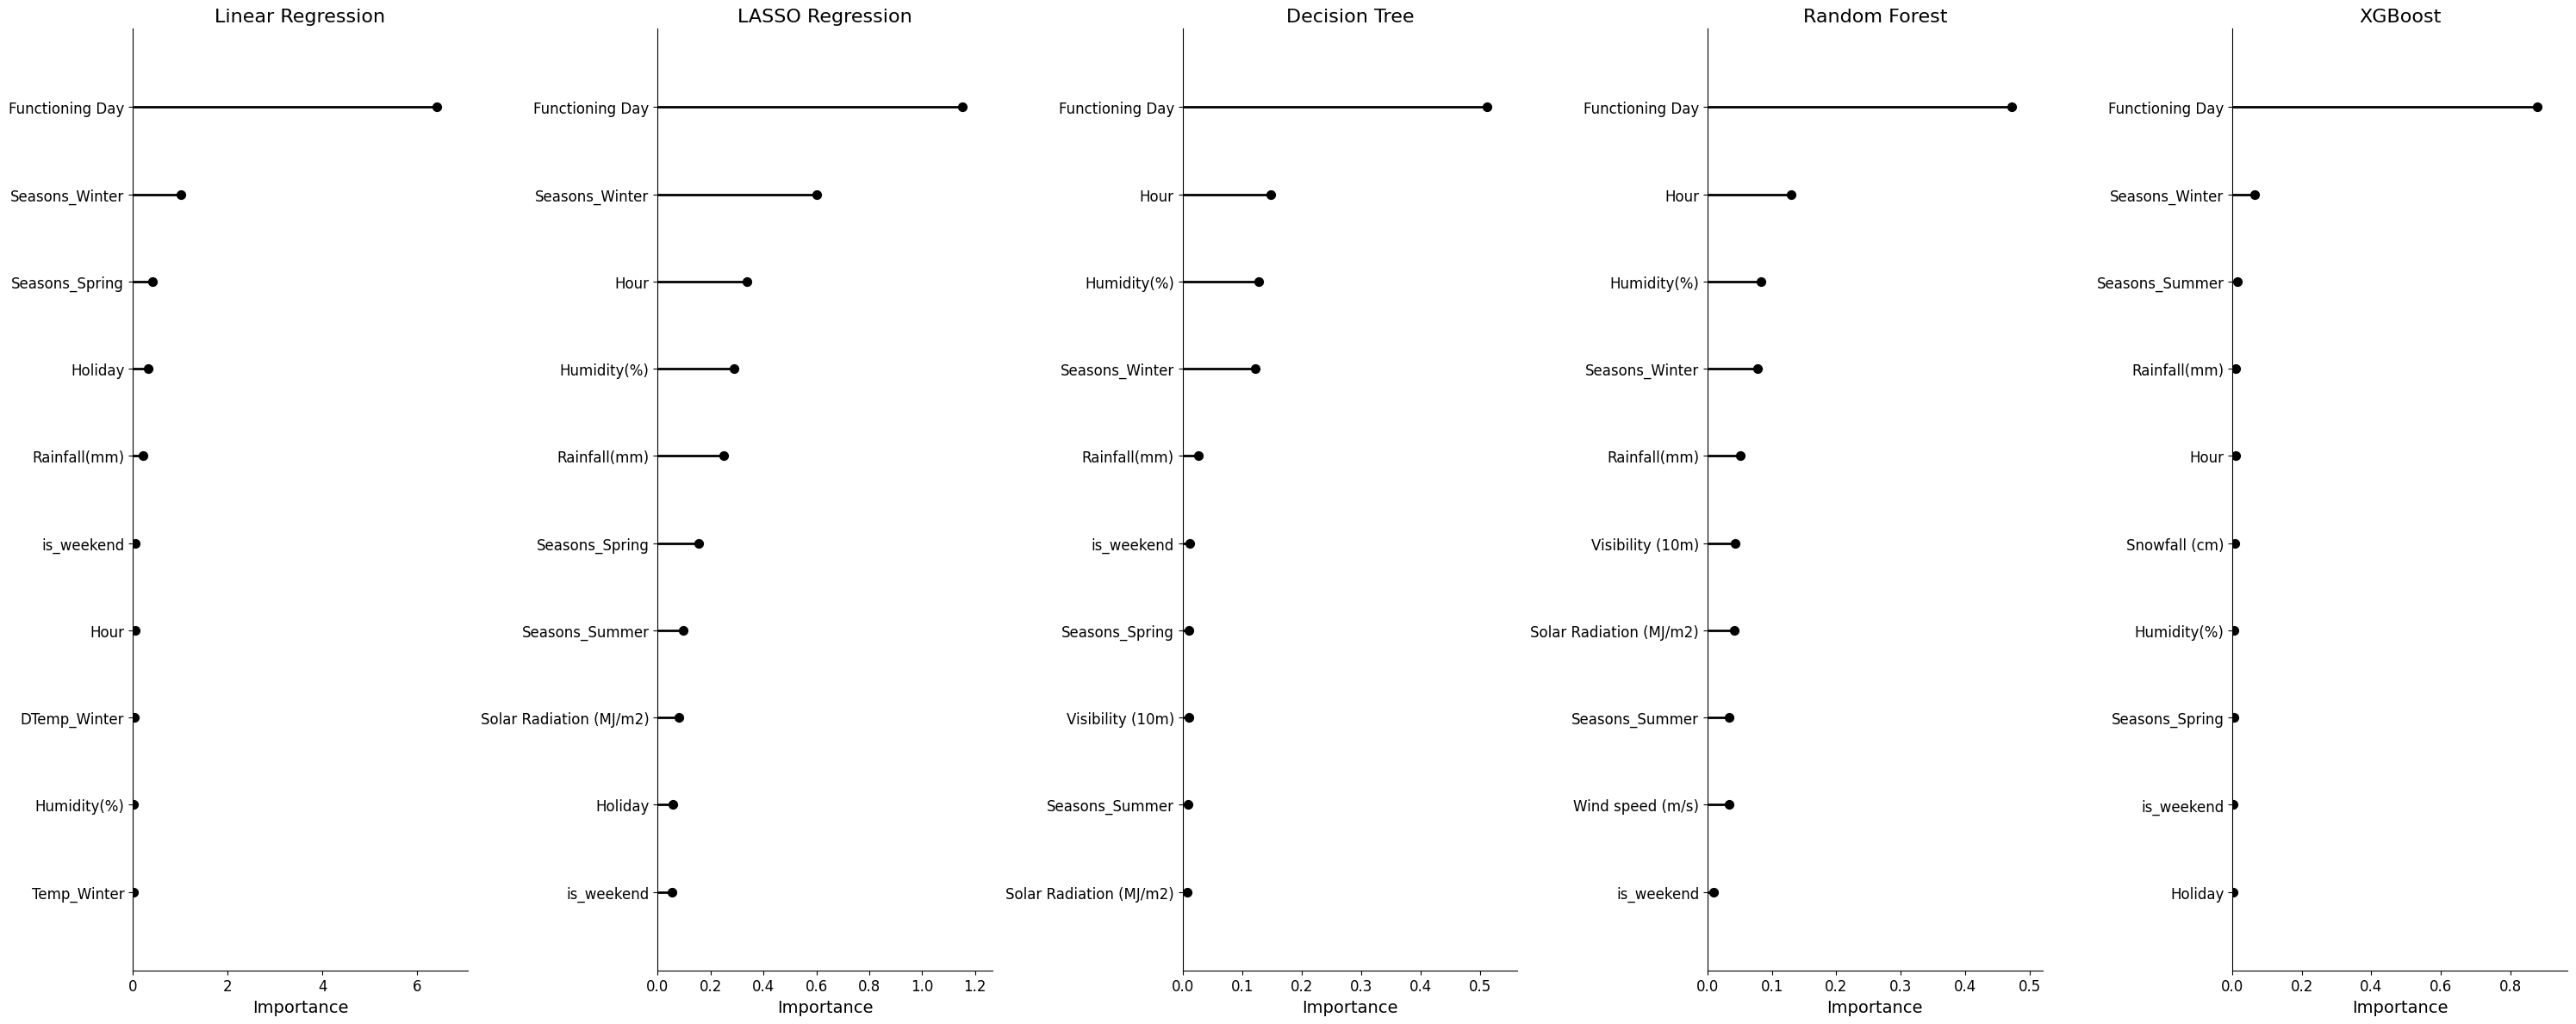

In [ ]:
# Use a clean style and set font
plt.style.use('default')
plt.rcParams['font.family'] = 'Arial'

def plot_feature_importance_line_dot(importance_df, title, ax):
    # Sort the DataFrame in ascending order
    importance_df = importance_df.sort_values(by='Importance')

    # Increase the size of the figure to improve readability
    # (This is handled in the main plotting section)

    # Plot the horizontal lines (lines from zero to the importance value)
    ax.hlines(y=importance_df['Feature'], xmin=0, xmax=importance_df['Importance'], color='black', linewidth=2)

    # Plot the dots at the importance values
    ax.scatter(importance_df['Importance'], importance_df['Feature'], color='black', s=50)

    # Set titles and labels with increased font sizes
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Importance', fontsize=14)
    ax.set_ylabel('')

    # Remove spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)

    # Adjust tick parameters for better readability
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)

    # Adjust the limits to add some padding
    ax.set_xlim(left=0, right=importance_df['Importance'].max() * 1.1)

    # Add a horizontal padding between the y-ticks
    ax.margins(y=0.1)

    # For long feature names, wrap them or adjust the text
    # Here, we'll wrap the text if necessary
    labels = importance_df['Feature']
    ax.set_yticklabels(labels, wrap=True)

# Assuming you have your importance DataFrames ready: importance_df_lr_top10, etc.

# List of DataFrames and titles
importance_dfs = [
    (importance_df_lr_top10, 'Linear Regression'),
    (importance_df_lasso_top10, 'LASSO Regression'),
    (importance_df_dt_top10, 'Decision Tree'),
    (importance_df_rf_top10, 'Random Forest'),
    (importance_df_xgb_top10, 'XGBoost')
]

# Set up the matplotlib figure with increased size for better readability
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 12), sharex=False)
plt.subplots_adjust(wspace=0.7)

# Generate the plots
for ax, (importance_df, title) in zip(axes, importance_dfs):
    plot_feature_importance_line_dot(importance_df, title, ax)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Holiday                    8760 non-null   int64         
 12  Functi

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Holiday                    8760 non-null   int64         
 12  Functi

## **Unsupervised Learning**

Principal Components and Explained Variance Percentage:
Principal Component 1: 22.14%
Principal Component 2: 15.60%
Principal Component 3: 9.85%
Principal Component 4: 8.42%
Principal Component 5: 6.67%
Principal Component 6: 5.55%
Principal Component 7: 4.93%
Principal Component 8: 4.67%
Principal Component 9: 4.36%
Principal Component 10: 4.06%
Principal Component 11: 3.41%
Principal Component 12: 2.87%
Principal Component 13: 2.35%
Principal Component 14: 1.75%
Principal Component 15: 1.11%
Principal Component 16: 0.73%
Principal Component 17: 0.59%
Principal Component 18: 0.33%
Principal Component 19: 0.27%
Principal Component 20: 0.24%
Principal Component 21: 0.07%
Principal Component 22: 0.02%

Explained Variance by Principal Components:
    Principal Component  Explained Variance %
0                     1             22.135246
1                     2             15.598984
2                     3              9.853793
3                     4              8.421940
4               

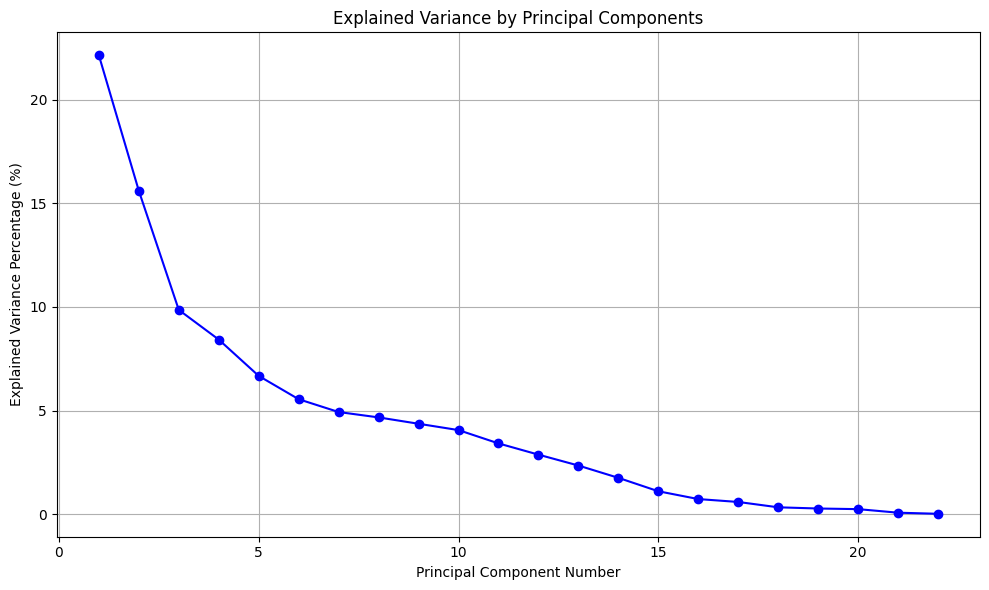

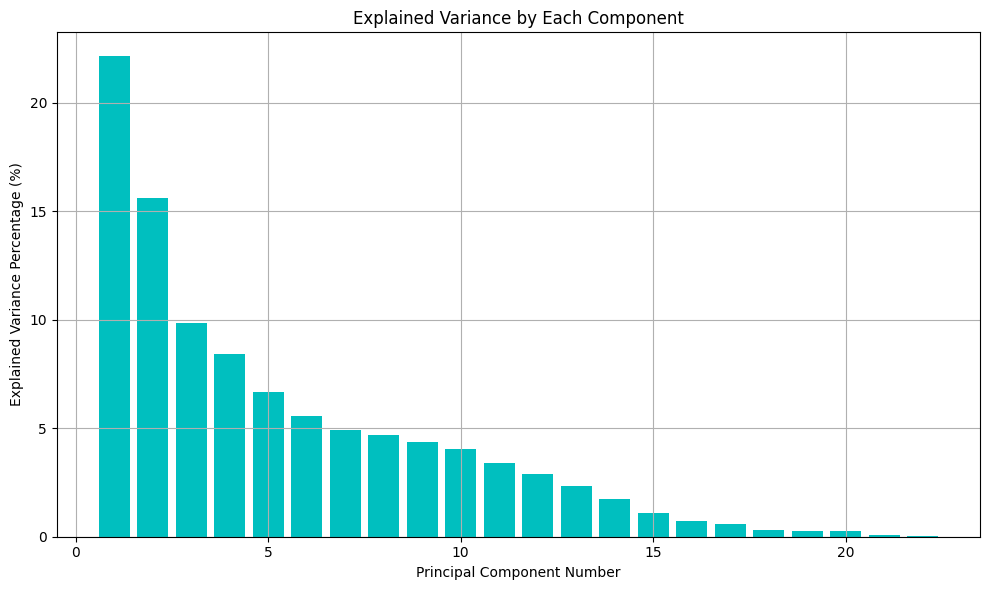

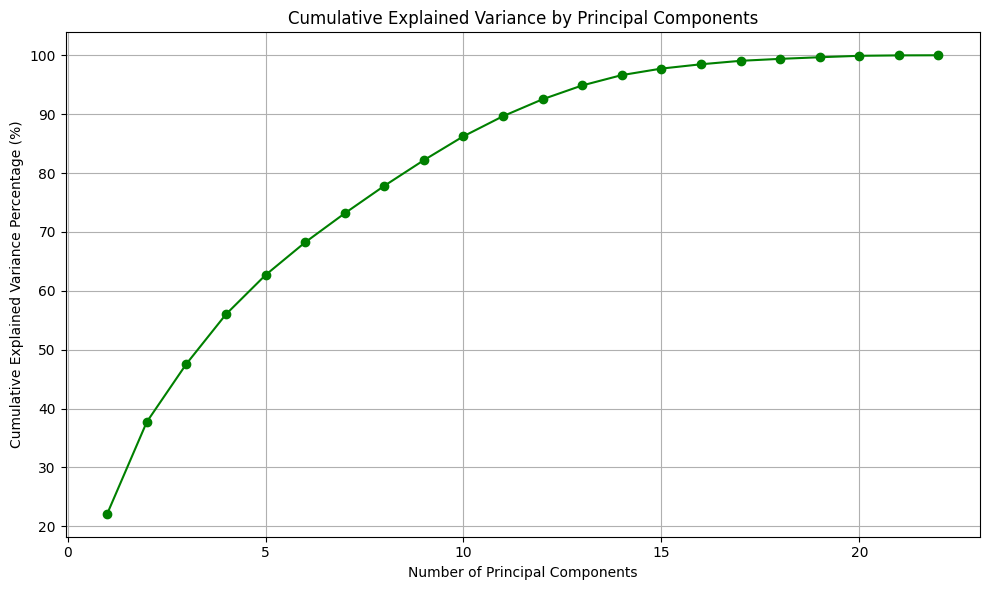


Number of components to retain to explain at least 90% variance: 12


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is named 'data'

# Step 1: Preprocess the data
# Drop non-numeric columns and the target variable
df_PCA = data.drop(columns=['Date', 'Year-Month', 'Rented Bike Count', 'Seasons_Autumn'])

# Select only numeric columns
data_numeric = df_PCA.select_dtypes(include=['number'])

# Standardize the data
data_scaled = StandardScaler().fit_transform(data_numeric)

# Step 2: Initialize and fit PCA
# Fit PCA to the dataset
pca = PCA()
pca.fit(data_scaled)

# Step 3: Examine the explained variance
explained_variance_ratio = pca.explained_variance_ratio_

# Output principal components by component number and explained variance %
print("Principal Components and Explained Variance Percentage:")
for i, variance in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {variance * 100:.2f}%")

# Alternatively, create a DataFrame for better presentation
explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance_ratio) + 1),
    'Explained Variance %': explained_variance_ratio * 100
})

print("\nExplained Variance by Principal Components:")
print(explained_variance_df)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Percentage (%)')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Plot explained variance in descending order as a bar graph
plt.figure(figsize=(10, 6))
sorted_variance = np.sort(explained_variance_ratio)[::-1] * 100
plt.bar(range(1, len(sorted_variance) + 1), sorted_variance, color='c')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Percentage (%)')
plt.title('Explained Variance by Each Component')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Decide on the number of components to keep based on the explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Percentage (%)')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Interpret the results
# Determine the number of components that explain the desired amount of variance (e.g., 90%)
desired_variance = 90  # in percentage
num_components = np.argmax(cumulative_variance * 100 >= desired_variance) + 1
print(f"\nNumber of components to retain to explain at least {desired_variance}% variance: {num_components}")

## **Model Prediction - XGB & Random Forest**

In [ ]:
X_test

,const,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,is_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter
6056,1.0,8,69,1.8,1999,0.70,0.0,0.0,0,1,0,0,1,0
5556,1.0,12,51,2.1,800,3.21,0.0,0.0,0,1,0,0,1,0
5990,1.0,14,50,1.2,1744,1.68,0.0,0.0,0,1,0,0,1,0
7674,1.0,18,47,1.4,1637,0.11,0.0,0.0,0,1,0,0,0,0
3319,1.0,7,51,1.0,1398,0.19,0.0,0.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8307,1.0,3,65,0.1,2000,0.00,0.0,0.0,0,1,0,0,0,0
100,1.0,4,34,3.0,2000,0.00,0.0,0.0,0,1,0,0,0,1
6605,1.0,5,65,1.1,2000,0.00,0.0,0.0,0,1,1,0,0,0
1783,1.0,7,70,1.9,1946,0.00,0.0,0.0,0,1,0,0,0,1


    Hour  Predicted_Bike_Supply
0      0             464.208107
1      1             347.793162
2      2             282.687879
3      3             193.102245
4      4             147.495234
5      5             154.034810
6      6             270.732202
7      7             554.819000
8      8             855.574182
9      9             528.801948
10    10             540.931083
11    11             654.014332
12    12             681.651266
13    13             723.948222
14    14             719.041393
15    15             753.848697
16    16             794.613137
17    17             997.368527
18    18            1266.030007
19    19             976.551173
20    20             960.430161
21    21             875.136600
22    22             843.994353
23    23             620.639764


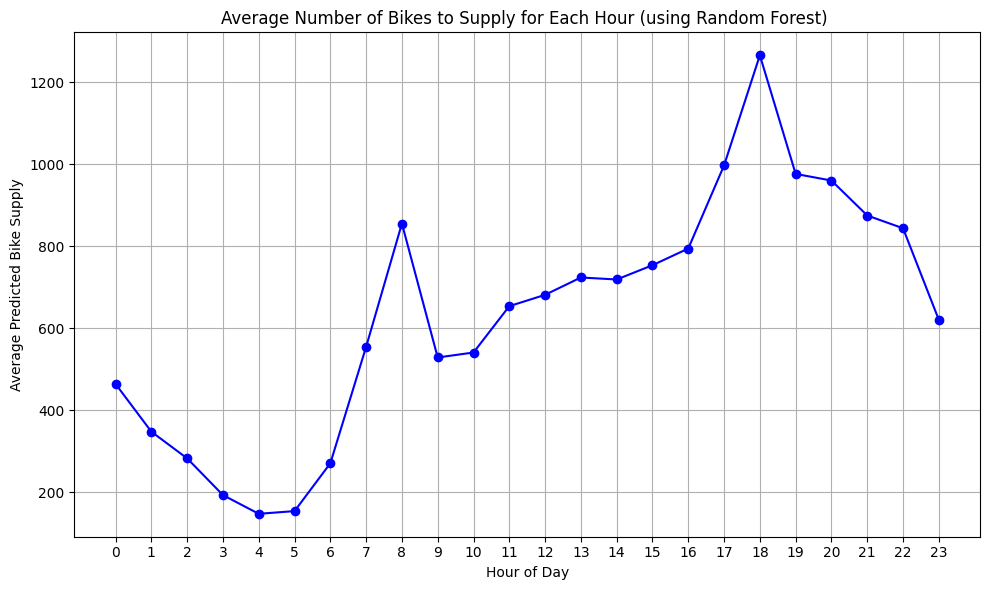

In [ ]:
# Step 1: Make predictions using the model
log_predicted_supply = rf_best.predict(X_test)

# Step 2: Inverse the log transformation to get the predictions back to the original scale
predicted_supply = np.exp(log_predicted_supply)

# Step 3: Create a DataFrame with predictions and the test set features
df_predictions = pd.DataFrame(X_test, columns=X_test.columns)
df_predictions['Predicted_Bike_Supply'] = predicted_supply

# Step 4: Group by 'Hour' to determine average supply per hour
hourly_supply = df_predictions.groupby('Hour')['Predicted_Bike_Supply'].mean().reset_index()

# Step 5: Display the result
print(hourly_supply)

# Step 6: Plot the average supply for each hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_supply['Hour'], hourly_supply['Predicted_Bike_Supply'], marker='o', linestyle='-', color='b')
plt.xlabel('Hour of Day')
plt.ylabel('Average Predicted Bike Supply')
plt.title('Average Number of Bikes to Supply for Each Hour (using Random Forest) ')
plt.grid(True)
plt.xticks(range(0, 24))  # Assuming data is for all hours of the day (0-23)
plt.tight_layout()
plt.show()


    Hour  Predicted_Bike_Supply
0      0             464.208107
1      1             347.793162
2      2             282.687879
3      3             193.102245
4      4             147.495234
5      5             154.034810
6      6             270.732202
7      7             554.819000
8      8             855.574182
9      9             528.801948
10    10             540.931083
11    11             654.014332
12    12             681.651266
13    13             723.948222
14    14             719.041393
15    15             753.848697
16    16             794.613137
17    17             997.368527
18    18            1266.030007
19    19             976.551173
20    20             960.430161
21    21             875.136600
22    22             843.994353
23    23             620.639764


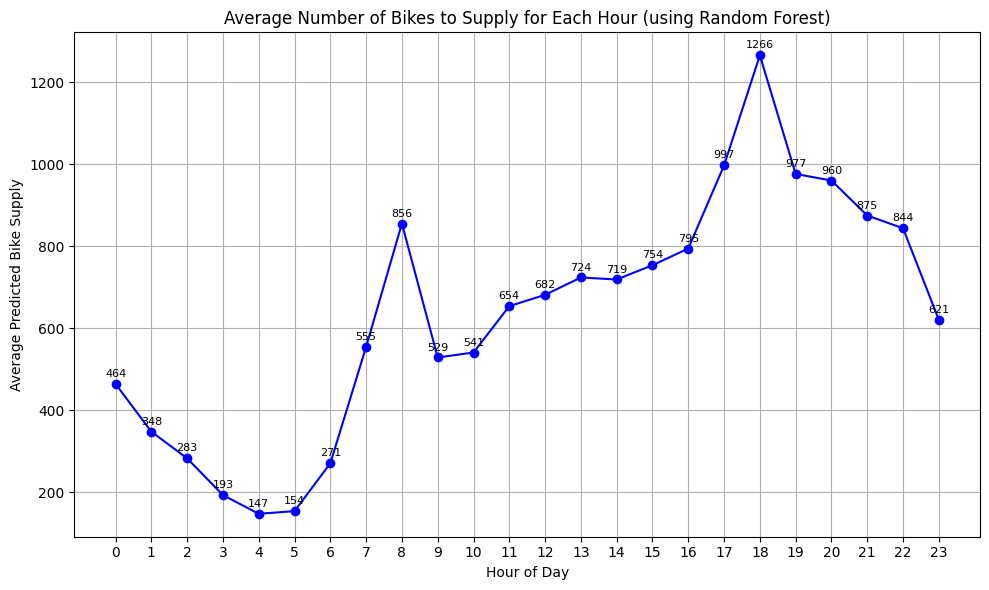

In [ ]:
# Step 1: Make predictions using the model
log_predicted_supply = rf_best.predict(X_test)

# Step 2: Inverse the log transformation to get the predictions back to the original scale
predicted_supply = np.exp(log_predicted_supply)

# Step 3: Create a DataFrame with predictions and the test set features
df_predictions = pd.DataFrame(X_test, columns=X_test.columns)
df_predictions['Predicted_Bike_Supply'] = predicted_supply

# Step 4: Group by 'Hour' to determine average supply per hour
hourly_supply = df_predictions.groupby('Hour')['Predicted_Bike_Supply'].mean().reset_index()

# Step 5: Display the result
print(hourly_supply)

# Step 6: Plot the average supply for each hour and label each point
plt.figure(figsize=(10, 6))
plt.plot(hourly_supply['Hour'], hourly_supply['Predicted_Bike_Supply'],
         marker='o', linestyle='-', color='b')
plt.xlabel('Hour of Day')
plt.ylabel('Average Predicted Bike Supply')
plt.title('Average Number of Bikes to Supply for Each Hour (using Random Forest)')
plt.grid(True)
plt.xticks(range(0, 24))  # Assuming data is for all hours of the day (0-23)

# Label each data point with the corresponding number
for x, y in zip(hourly_supply['Hour'], hourly_supply['Predicted_Bike_Supply']):
    label = f"{y:.0f}"  # Format the number without decimal places
    plt.annotate(
        label,                   # The text to display
        (x, y),                  # The point to label
        textcoords="offset points",
        xytext=(0, 5),           # Offset position (x, y) from the point
        ha='center',             # Horizontal alignment
        fontsize=8               # Font size of the labels
    )

plt.tight_layout()
plt.show()

    Hour  Predicted_Bike_Supply
0      0             551.049561
1      1             355.374451
2      2             297.339020
3      3             197.648346
4      4             129.248657
5      5             136.230362
6      6             306.272369
7      7             596.172363
8      8            1069.848145
9      9             560.146545
10    10             514.579895
11    11             642.057617
12    12             711.581726
13    13             731.696655
14    14             743.808289
15    15             773.294983
16    16             839.267517
17    17            1064.202148
18    18            1443.032104
19    19            1038.309326
20    20            1016.038513
21    21             945.483643
22    22             863.448669
23    23             605.369873


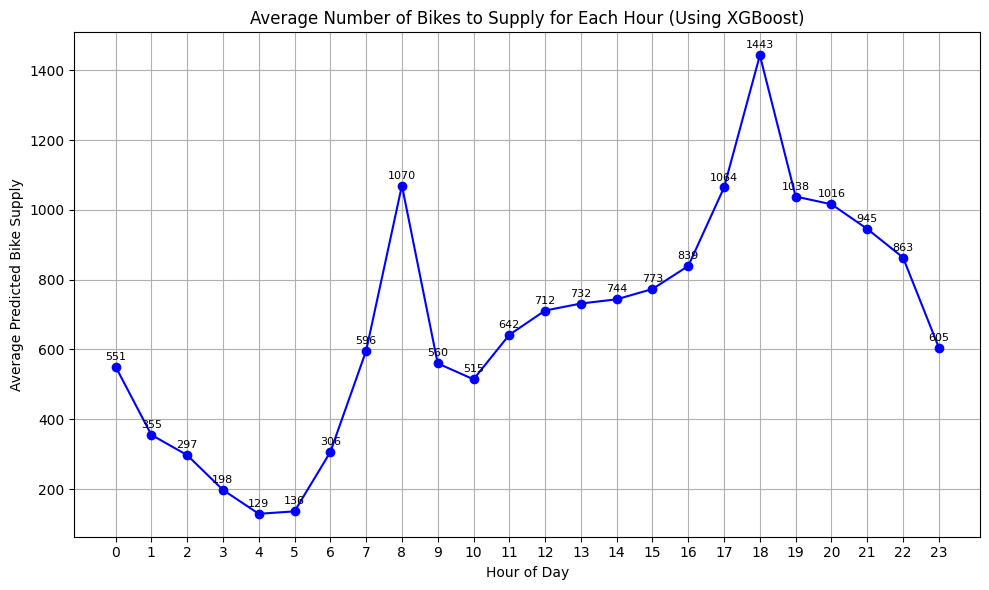

In [ ]:
# Step 1: Predict the number of bikes to supply for each hour using XGBoost
# The target variable (y) was previously log-transformed, so inverse transform it after prediction
log_predicted_supply = xgb_best.predict(X_test)

# Step 2: Inverse the log transformation to get the predictions back to the original scale
predicted_supply = np.exp(log_predicted_supply)

# Step 3: Create a DataFrame with predictions and features
# Assuming 'X_test' has a column named 'Hour' and other relevant features
df_predictions = pd.DataFrame(X_test, columns=X_test.columns)
df_predictions['Predicted_Bike_Supply'] = predicted_supply

# Step 4: Group the predictions by Hour to determine average supply per hour
hourly_supply = df_predictions.groupby('Hour')['Predicted_Bike_Supply'].mean().reset_index()

# Step 5: Display the average supply for each hour
print(hourly_supply)

# Step 6: Plot the average supply for each hour and add number labels
plt.figure(figsize=(10, 6))
plt.plot(hourly_supply['Hour'], hourly_supply['Predicted_Bike_Supply'],
         marker='o', linestyle='-', color='b')
plt.xlabel('Hour of Day')
plt.ylabel('Average Predicted Bike Supply')
plt.title('Average Number of Bikes to Supply for Each Hour (Using XGBoost)')
plt.grid(True)
plt.xticks(range(0, 24))  # Assuming data is for all hours of the day (0-23)

# Add number labels to each data point
for x, y in zip(hourly_supply['Hour'], hourly_supply['Predicted_Bike_Supply']):
    label = f"{y:.0f}"  # Format the label to zero decimal places
    plt.annotate(label,                      # Text to display
                 (x, y),                      # Point to label
                 textcoords="offset points",  # Positioning method
                 xytext=(0, 5),               # Offset from the point
                 ha='center',                 # Horizontal alignment
                 fontsize=8)                  # Font size of labels

plt.tight_layout()
plt.show()

Average Number of Bikes Supplied per Day: 3240.60

Total Predicted Bike Supply per Day:
          Date  Predicted_Bike_Supply
0   2017-12-01            2077.943115
1   2017-12-02             803.311523
2   2017-12-03            1447.084595
3   2017-12-04            2600.380615
4   2017-12-05            1048.317871
..         ...                    ...
359 2018-11-26            8206.591797
360 2018-11-27            5310.185059
361 2018-11-28            3612.589355
362 2018-11-29            2932.442871
363 2018-11-30            4266.470703

[364 rows x 2 columns]


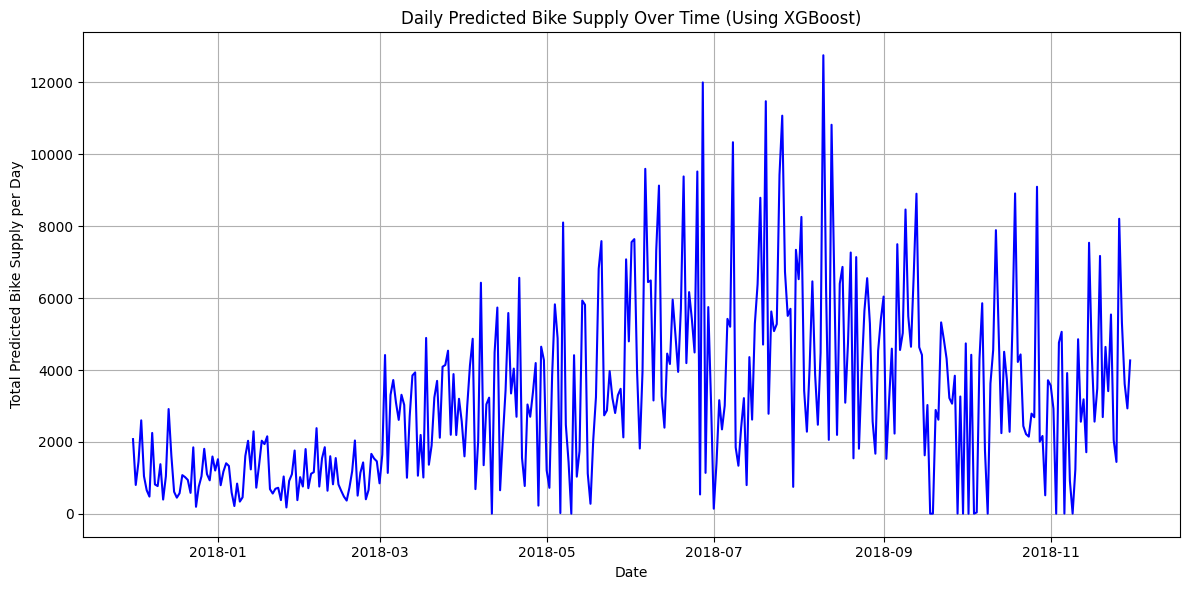

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Predict the number of bikes to supply for each instance using XGBoost
# The target variable (y) was previously log-transformed, so inverse transform it after prediction
log_predicted_supply = xgb_best.predict(X_test)

# Step 2: Inverse the log transformation to get the predictions back to the original scale
predicted_supply = np.exp(log_predicted_supply)

# Step 3: Create a DataFrame with predictions and features
# Ensure 'Date' is included in 'df_predictions'

# If 'Date' is not in X_test, retrieve it from the original data using the indices
df_predictions = pd.DataFrame(X_test, columns=X_test.columns)

# Assuming 'data' is your original DataFrame that includes 'Date'
# Align indices to merge 'Date' correctly
df_predictions['Date'] = data.loc[X_test.index, 'Date']

df_predictions['Predicted_Bike_Supply'] = predicted_supply

# Step 4: Convert 'Date' to datetime if not already
df_predictions['Date'] = pd.to_datetime(df_predictions['Date'])

# Step 5: Group the predictions by 'Date' to sum the supply per day
daily_supply = df_predictions.groupby('Date')['Predicted_Bike_Supply'].sum().reset_index()

# Step 6: Compute the average number of bikes supplied per day
average_daily_supply = daily_supply['Predicted_Bike_Supply'].mean()
print(f"Average Number of Bikes Supplied per Day: {average_daily_supply:.2f}")

# Step 7: Optionally, display the daily supply
print("\nTotal Predicted Bike Supply per Day:")
print(daily_supply)

# Step 8: Optionally, plot the daily supply over time
plt.figure(figsize=(12, 6))
plt.plot(daily_supply['Date'], daily_supply['Predicted_Bike_Supply'], linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Predicted Bike Supply per Day')
plt.title('Daily Predicted Bike Supply Over Time (Using XGBoost)')
plt.grid(True)
plt.tight_layout()
plt.show()

Missing columns in X_winter: {'const'}
Extra columns in X_winter: {'Hour_weekend', 'Dew point temperature(°C)', 'Temp_Winter', 'Solar_Wind', 'Temp_Summer', 'Hour_Wind', 'DTemp_Winter', 'Temp_Snow', 'Temperature(°C)'}
Missing columns in X_summer: {'const'}
Extra columns in X_summer: {'Hour_weekend', 'Dew point temperature(°C)', 'Temp_Winter', 'Solar_Wind', 'Temp_Summer', 'Hour_Wind', 'DTemp_Winter', 'Temp_Snow', 'Temperature(°C)'}
Missing columns in X_weekend: {'const'}
Extra columns in X_weekend: {'Hour_weekend', 'Dew point temperature(°C)', 'Temp_Winter', 'Solar_Wind', 'Temp_Summer', 'Hour_Wind', 'DTemp_Winter', 'Temp_Snow', 'Temperature(°C)'}
Missing columns in X_holiday: {'const'}
Extra columns in X_holiday: {'Hour_weekend', 'Dew point temperature(°C)', 'Temp_Winter', 'Solar_Wind', 'Temp_Summer', 'Hour_Wind', 'DTemp_Winter', 'Temp_Snow', 'Temperature(°C)'}


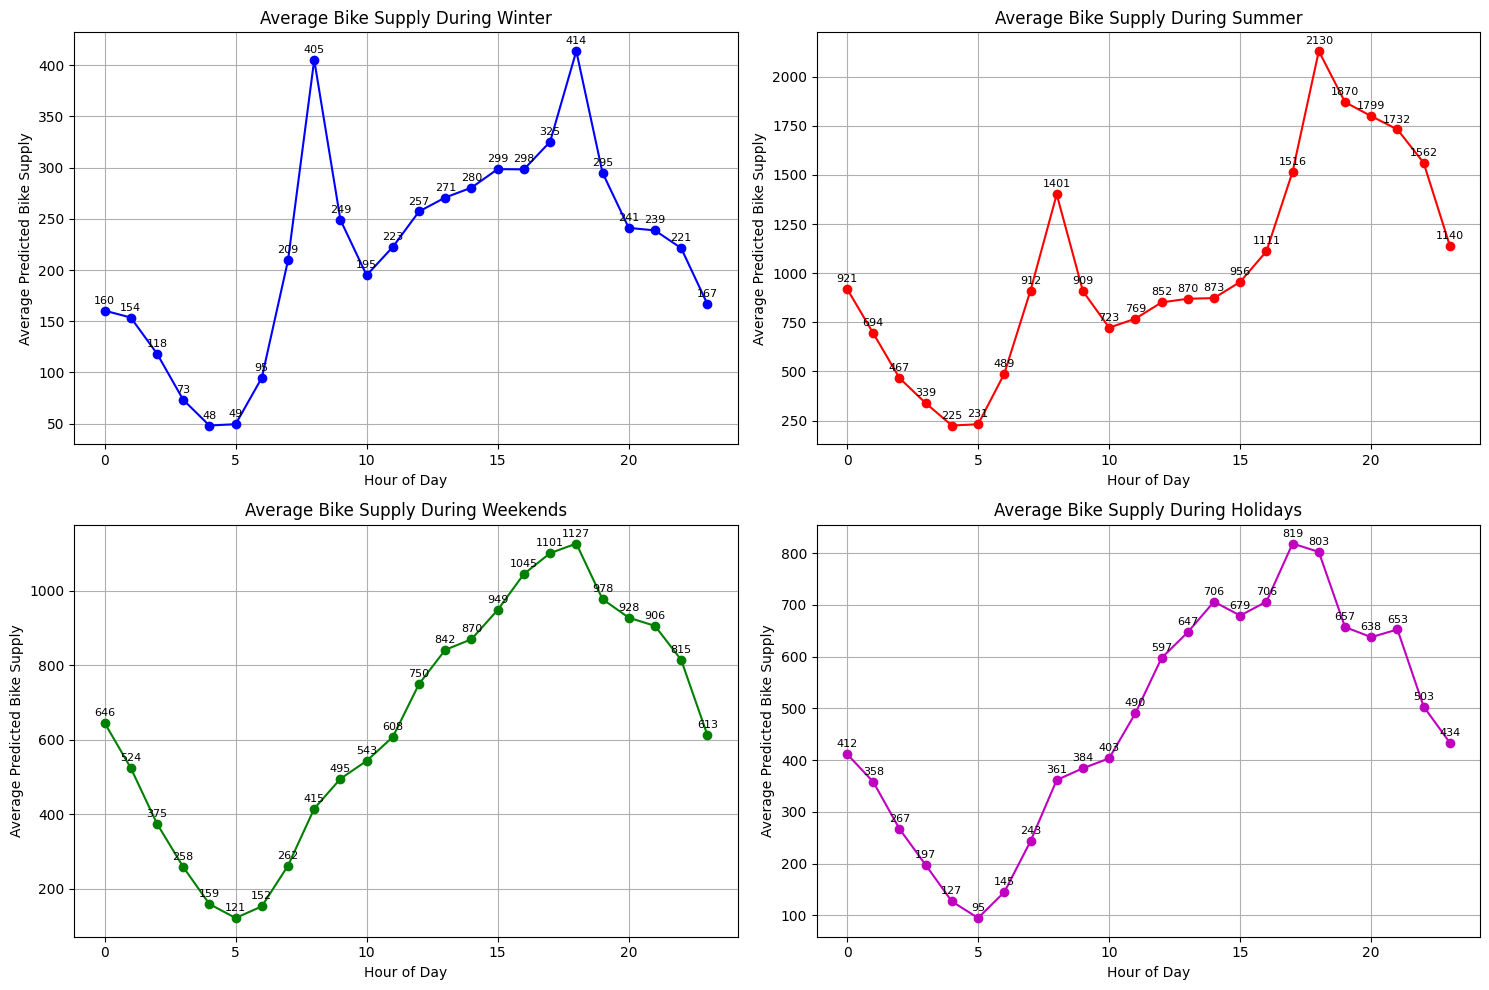

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define Preprocessing Function
def preprocess_data(df):
    # Create interaction terms
    df['Temp_Summer'] = df['Temperature(°C)'] * df['Seasons_Summer']
    df['Temp_Winter'] = df['Temperature(°C)'] * df['Seasons_Winter']
    df['Temp_Snow'] = df['Snowfall (cm)'] * df['Temperature(°C)']
    df['DTemp_Winter'] = df['Seasons_Winter'] * df['Dew point temperature(°C)']
    df['Hour_Wind'] = df['Hour'] * df['Wind speed (m/s)']
    df['Solar_Wind'] = df['Solar Radiation (MJ/m2)'] * df['Wind speed (m/s)']

    # Drop columns that are not features
    columns_to_drop = ['Date', 'Year-Month', 'Rented Bike Count', 'Seasons_Autumn']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    return df

# Step 2: Prepare Data Subsets
# Data subsets for specific conditions
data_winter = data[data['Seasons_Winter'] == 1].copy()
data_summer = data[data['Seasons_Summer'] == 1].copy()
data_weekend = data[data['is_weekend'] == 1].copy()
data_holiday = data[data['Holiday'] == 1].copy()

# Step 3: Preprocess the Data Subsets
X_winter = preprocess_data(data_winter)
X_summer = preprocess_data(data_summer)
X_weekend = preprocess_data(data_weekend)
X_holiday = preprocess_data(data_holiday)

# Step 4: Ensure Feature Columns Match
# Use the same feature columns as in training
feature_columns = X_train.columns.tolist()

# For each subset, ensure all features are present and in the correct order
datasets = [('X_winter', X_winter), ('X_summer', X_summer), ('X_weekend', X_weekend), ('X_holiday', X_holiday)]
updated_datasets = {}
for name, X_subset in datasets:
    # Identify missing columns
    missing_cols = set(feature_columns) - set(X_subset.columns)
    if missing_cols:
        print(f"Missing columns in {name}: {missing_cols}")
        # Add missing columns with default value 0
        for col in missing_cols:
            X_subset[col] = 0
    # Identify extra columns
    extra_cols = set(X_subset.columns) - set(feature_columns)
    if extra_cols:
        print(f"Extra columns in {name}: {extra_cols}")
        # Drop extra columns
        X_subset = X_subset.drop(columns=extra_cols)
    # Reorder columns to match training data
    X_subset = X_subset[feature_columns]
    updated_datasets[name] = X_subset

# Update variables with preprocessed and aligned data
X_winter = updated_datasets['X_winter']
X_summer = updated_datasets['X_summer']
X_weekend = updated_datasets['X_weekend']
X_holiday = updated_datasets['X_holiday']

# Step 5: Make Predictions
predictions_winter = xgb_best.predict(X_winter)
predictions_summer = xgb_best.predict(X_summer)
predictions_weekend = xgb_best.predict(X_weekend)
predictions_holiday = xgb_best.predict(X_holiday)

# Step 6: Inverse Transform Predictions if Target Was Log-Transformed
predictions_winter = np.exp(predictions_winter)
predictions_summer = np.exp(predictions_summer)
predictions_weekend = np.exp(predictions_weekend)
predictions_holiday = np.exp(predictions_holiday)

# Step 7: Add Predictions Back to DataFrames
data_winter['Predicted_Bike_Supply'] = predictions_winter
data_summer['Predicted_Bike_Supply'] = predictions_summer
data_weekend['Predicted_Bike_Supply'] = predictions_weekend
data_holiday['Predicted_Bike_Supply'] = predictions_holiday

# Step 8: Calculate Average Predictions per Hour
avg_winter_supply = data_winter.groupby('Hour')['Predicted_Bike_Supply'].mean().reset_index()
avg_summer_supply = data_summer.groupby('Hour')['Predicted_Bike_Supply'].mean().reset_index()
avg_weekend_supply = data_weekend.groupby('Hour')['Predicted_Bike_Supply'].mean().reset_index()
avg_holiday_supply = data_holiday.groupby('Hour')['Predicted_Bike_Supply'].mean().reset_index()

# Step 9: Visualize the Results with Number Labels
plt.figure(figsize=(15, 10))

# Winter
plt.subplot(2, 2, 1)
plt.plot(avg_winter_supply['Hour'], avg_winter_supply['Predicted_Bike_Supply'],
         marker='o', linestyle='-', color='b')
plt.title('Average Bike Supply During Winter')
plt.xlabel('Hour of Day')
plt.ylabel('Average Predicted Bike Supply')
plt.grid(True)

# Add number labels
for x, y in zip(avg_winter_supply['Hour'], avg_winter_supply['Predicted_Bike_Supply']):
    plt.annotate(f"{y:.0f}", (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# Summer
plt.subplot(2, 2, 2)
plt.plot(avg_summer_supply['Hour'], avg_summer_supply['Predicted_Bike_Supply'],
         marker='o', linestyle='-', color='r')
plt.title('Average Bike Supply During Summer')
plt.xlabel('Hour of Day')
plt.ylabel('Average Predicted Bike Supply')
plt.grid(True)

# Add number labels
for x, y in zip(avg_summer_supply['Hour'], avg_summer_supply['Predicted_Bike_Supply']):
    plt.annotate(f"{y:.0f}", (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# Weekend
plt.subplot(2, 2, 3)
plt.plot(avg_weekend_supply['Hour'], avg_weekend_supply['Predicted_Bike_Supply'],
         marker='o', linestyle='-', color='g')
plt.title('Average Bike Supply During Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Predicted Bike Supply')
plt.grid(True)

# Add number labels
for x, y in zip(avg_weekend_supply['Hour'], avg_weekend_supply['Predicted_Bike_Supply']):
    plt.annotate(f"{y:.0f}", (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# Holiday
plt.subplot(2, 2, 4)
plt.plot(avg_holiday_supply['Hour'], avg_holiday_supply['Predicted_Bike_Supply'],
         marker='o', linestyle='-', color='m')
plt.title('Average Bike Supply During Holidays')
plt.xlabel('Hour of Day')
plt.ylabel('Average Predicted Bike Supply')
plt.grid(True)

# Add number labels
for x, y in zip(avg_holiday_supply['Hour'], avg_holiday_supply['Predicted_Bike_Supply']):
    plt.annotate(f"{y:.0f}", (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

plt.tight_layout()
plt.show()
